In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.model_selection import train_test_split

# **Reading Data**

In [2]:
df = pd.read_csv("dataset.csv")

In [115]:
#get to know the data
print(df.head())
print(df.shape)

   Unnamed: 0  hemoglobin  hearing(right)  dental caries  fasting blood sugar  \
0           0        16.5               1              0                   94   
1           1        16.2               2              1                  147   
2           2        17.4               1              0                   79   
3           3        15.9               1              1                   91   
4           4        15.4               1              0                   91   

   LDL  height(cm)  weight(kg)  Cholesterol  serum creatinine  Gtp  smoking  
0   75         165          60          172               1.0   27        1  
1  126         165          65          194               1.1   37        0  
2   93         170          75          178               0.8   53        1  
3  102         180          95          180               1.0   30        0  
4   93         165          60          155               0.8   17        1  
(159256, 12)


Splitting the data into train, validation, and test sets

In [3]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
test_df, val_df = train_test_split(test_df, test_size=0.5, random_state=42)

# Print the shapes of the train, validation, and test sets
print("Train set shape:", train_df.shape)
print("Validation set shape:", val_df.shape)
print("Test set shape:", test_df.shape)


Train set shape: (127404, 12)
Validation set shape: (15926, 12)
Test set shape: (15926, 12)


# **Useful Functions**

In [8]:
def zscore_norm(df, column_name):
    return (df[column_name] - df[column_name].mean()) / df[column_name].std()

def min_max_norm(df, column_name):
    return (df[column_name] - df[column_name].min()) / (df[column_name].max() - df[column_name].min())    

# **Univariate Data Analysis**

Target (Smoking) Disribution

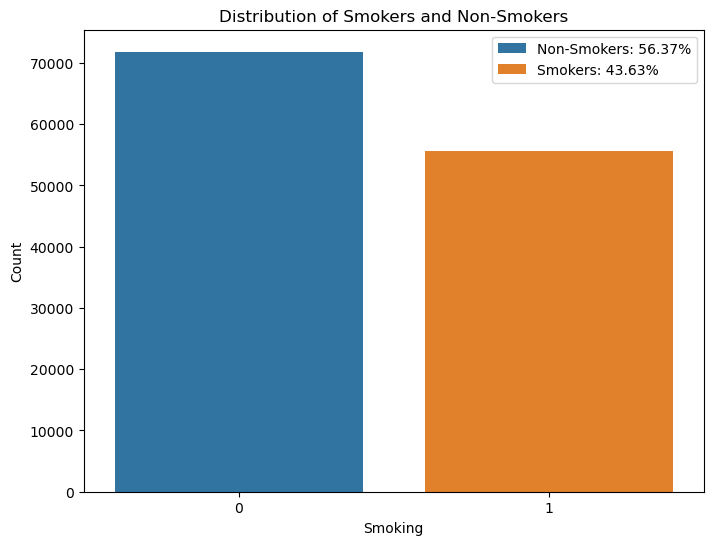

In [18]:
target = train_df[["smoking"]]
num_samples = len(train_df)
smokers_count = len(train_df[train_df["smoking"] == 1])
nonsmokers_count = len(train_df[train_df["smoking"] == 0])
somkers_percentage = 100 * smokers_count/num_samples
nonsmokers_percentage = 100 * nonsmokers_count/num_samples
plt.figure(figsize=(8, 6))
sns.countplot(x="smoking", data=train_df, hue="smoking")
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.title('Distribution of Smokers and Non-Smokers')
plt.legend(labels=[f'Non-Smokers: {round(nonsmokers_percentage,2)}%',  f"Smokers: {round(somkers_percentage,2)}%"])

plt.show()

### **Feature 1: hemoglobin**

Observations: 
1- The distribution for hemoglobin is almost gaussian, but is skewed to the left

2- Hemoglobin for smokers is on average higher than for non smokers

Hemoglobin:
Mean 14.793
Median 15.0
Max Value 20.4
Min Value 5.8
Range 14.6
Standard Deviation 1.432
Skew -0.637
IQR 2.0


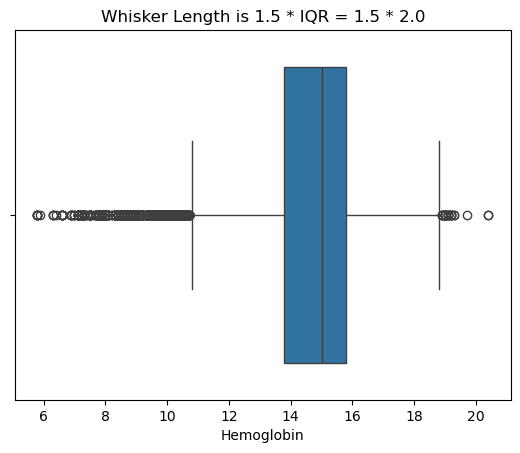

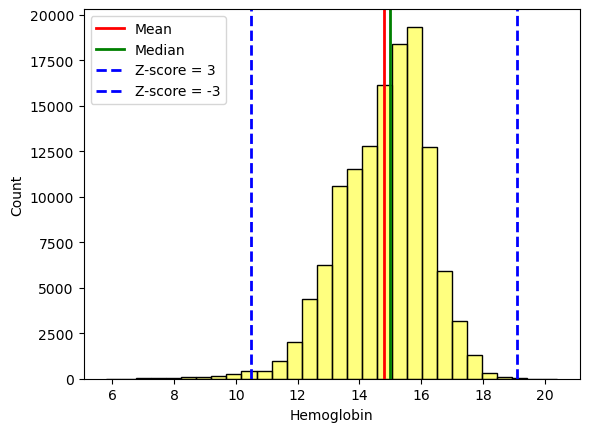

In [19]:
# Analyzing Hemoglobin Feature without information about the target
hemoglobin_feature = train_df["hemoglobin"]

# Central Tendency Measures
hemoglobin_mean = hemoglobin_feature.mean()
hemoglobin_median = hemoglobin_feature.median()

# Measures of Dispersion
hemoglobin_max_val = hemoglobin_feature.max()
hemoglobin_min_val = hemoglobin_feature.min()
hemoglobin_range = hemoglobin_max_val - hemoglobin_min_val
hemoglobin_std = hemoglobin_feature.std()
hemoglobin_skew = hemoglobin_feature.skew()
hemoglobin_iqr = hemoglobin_feature.quantile(0.75) - hemoglobin_feature.quantile(0.25)
z_score_positive3 = 3 * hemoglobin_std + hemoglobin_mean
z_score_negative3 = -3 * hemoglobin_std + hemoglobin_mean

print("Hemoglobin:")
print(f"Mean {round(hemoglobin_mean, 3)}")
print(f"Median {round(hemoglobin_median, 3)}")
print(f"Max Value {round(hemoglobin_max_val, 3)}")
print(f"Min Value {round(hemoglobin_min_val, 3)}")
print(f"Range {round(hemoglobin_range, 3)}")
print(f"Standard Deviation {round(hemoglobin_std, 3)}")
print(f"Skew {round(hemoglobin_skew, 3)}")
print(f"IQR {round(hemoglobin_iqr, 3)}")


# Box Plot for Hemoglobin Feature
sns.boxplot(x=hemoglobin_feature)
plt.xlabel('Hemoglobin')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(hemoglobin_iqr, 3)}")
plt.show()

# Histogram for Hemoglobin Feature
sns.histplot(hemoglobin_feature, bins=30, alpha=0.5, color="yellow")
plt.xlabel('Hemoglobin')
plt.ylabel('Count')
plt.axvline(hemoglobin_mean, c='red', ls='-', lw=2)
plt.axvline(hemoglobin_median, c='green', ls='-', lw=2)
plt.axvline(z_score_positive3, c='blue', ls='--', lw=2)
plt.axvline(z_score_negative3, c='blue', ls='--', lw=2)

plt.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
plt.show()

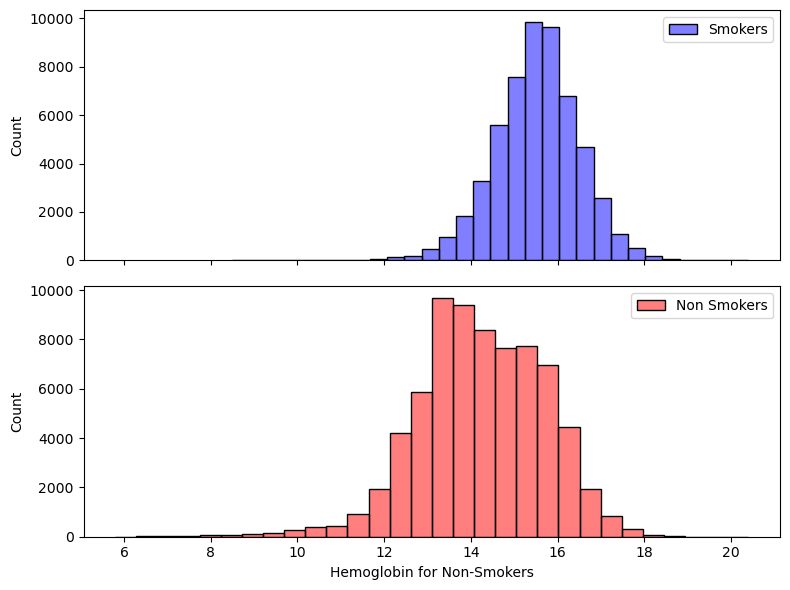

In [20]:
hemoglobin_smokers = train_df[train_df['smoking'] == 1]['hemoglobin']
hemoglobin_nonsmokers = train_df[train_df['smoking'] == 0]['hemoglobin']

# Creating subplots with two histograms stacked vertically for 'Hemoglobin' with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)  # Share x-axis between subplots

sns.histplot(data=hemoglobin_smokers, color='blue', alpha=0.5, bins=30, label='Smokers', ax=ax1)
ax1.set_xlabel('Hemoglobin for Smokers')
ax1.legend()

sns.histplot(data=hemoglobin_nonsmokers, color='red', alpha=0.5, bins=30, label='Non Smokers', ax=ax2)
ax2.set_xlabel('Hemoglobin for Non-Smokers')
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### **Feature 3: Dental Carries**

Observations:
1- Most Individuals Don't Have Dental Carries

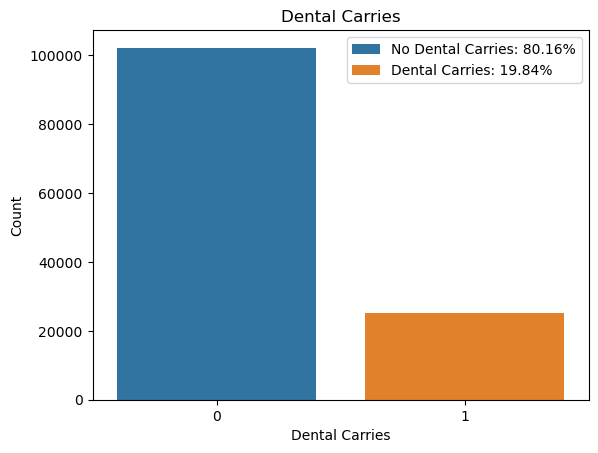

In [21]:
# Analyzing Dental Carries Feature without information about the target

dental_feature = train_df[["dental caries"]]
dental_carries_percentage = 100 * len(train_df[train_df["dental caries"]==1]) / num_samples
no_dental_carries_percentage = 100 * len(train_df[train_df["dental caries"]== 0]) / num_samples



# Histogram for Dental Carries Feature
sns.countplot(x="dental caries", data=train_df, hue="dental caries")
plt.xlabel('Dental Carries')
plt.ylabel('Count')
plt.title('Dental Carries')
plt.legend(labels=[f'No Dental Carries: {round(no_dental_carries_percentage,2)}%',  f"Dental Carries: {round(dental_carries_percentage,2)}%"])
plt.show()





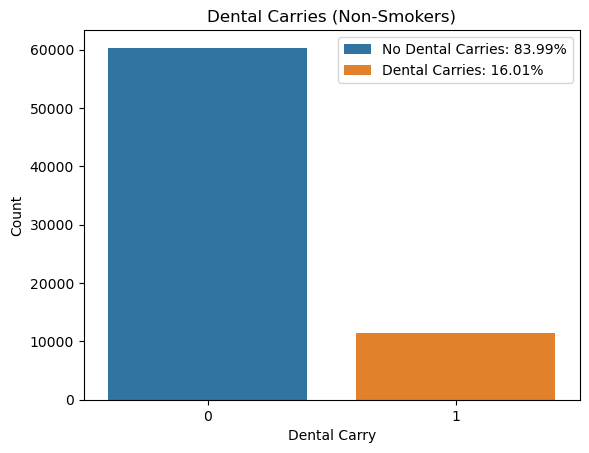

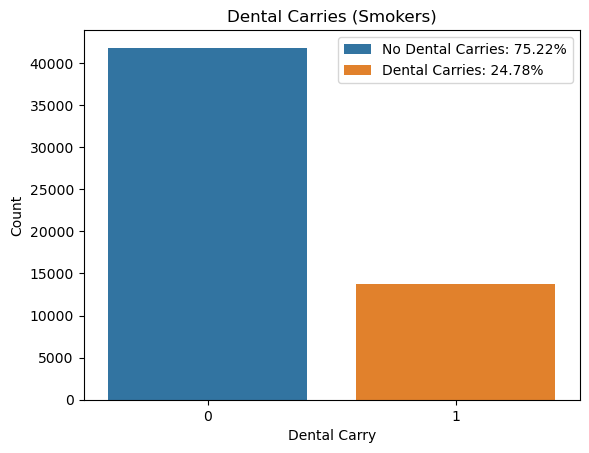

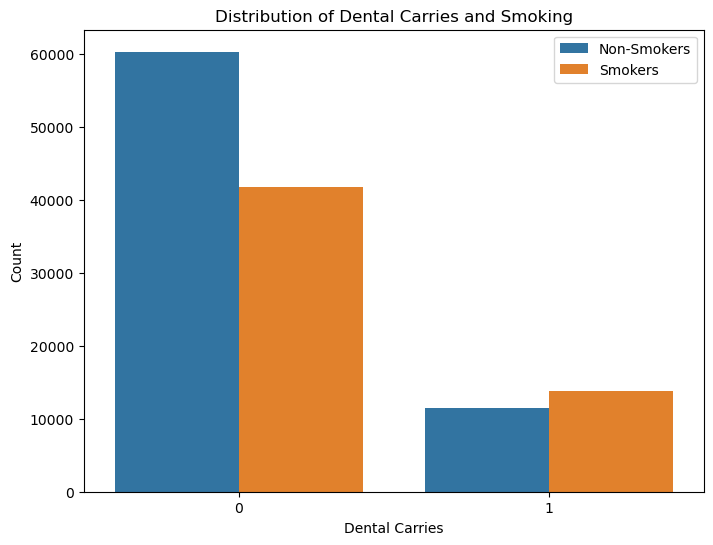

In [22]:
# Analyzing Dental Carries Feature For Non-Smokers
dental_nonsmokers = train_df[train_df["smoking"] == 0][["dental caries"]]

dental_carries_percentage_nonsmokers = 100 * len(dental_nonsmokers[dental_nonsmokers["dental caries"]==1]) / len(dental_nonsmokers)
no_dental_carries_percentage__nonsmokers = 100 * len(dental_nonsmokers[dental_nonsmokers["dental caries"]== 0]) / len(dental_nonsmokers)

# Histogram for Dental Carries For Non Smokers
sns.countplot(x="dental caries", data=dental_nonsmokers, hue="dental caries")
plt.xlabel('Dental Carry')
plt.ylabel('Count')
plt.title('Dental Carries (Non-Smokers)')
plt.legend(labels=[f'No Dental Carries: {round(no_dental_carries_percentage__nonsmokers,2)}%',  f"Dental Carries: {round(dental_carries_percentage_nonsmokers,2)}%"])
plt.show()

# Analyzing Dental Carries Feature For Smokers
dental_smokers = train_df[train_df["smoking"] == 1][["dental caries"]]

dental_carries_percentage_smokers = 100 * len(dental_smokers[dental_smokers["dental caries"]==1]) / len(dental_smokers)
no_dental_carries_percentage__smokers = 100 * len(dental_smokers[dental_smokers["dental caries"]== 0]) / len(dental_smokers)

# Histogram for Dental Carries For Smokers
sns.countplot(x="dental caries", data=dental_smokers, hue="dental caries")
plt.xlabel('Dental Carry')
plt.ylabel('Count')
plt.title('Dental Carries (Smokers)')
plt.legend(labels=[f'No Dental Carries: {round(no_dental_carries_percentage__smokers,2)}%',  f"Dental Carries: {round(dental_carries_percentage_smokers,2)}%"])
plt.show()


# Hearing Feature with respect to the target
plt.figure(figsize=(8, 6))
sns.countplot(x="dental caries", data=train_df, hue="smoking")
plt.xlabel('Dental Carries')
plt.ylabel('Count')
plt.title('Distribution of Dental Carries and Smoking')
plt.legend(labels=["Non-Smokers", "Smokers"])
plt.show()

### **Feature 5: LDL**

Observation: Data Resembles a Gausian Distribution after removing outliers with LDL > 500.
LDL is slightly lower for smokers on average.

LDL:
Mean 114.625
Median 114.0
Max Value 1860
Min Value 1
Range 1859
Standard Deviation 28.536
Skew 7.89
IQR 38.0


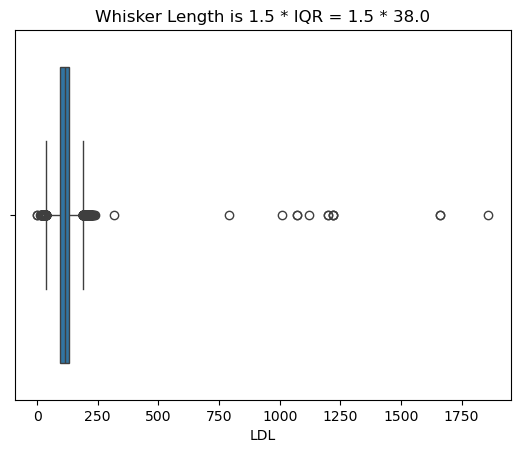

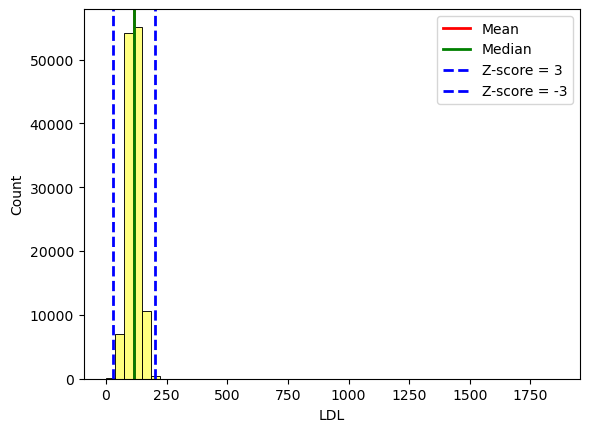

In [23]:
# Analyzing LDL Feature without information about the target
LDL_feature = train_df["LDL"]

# Central Tendency Measures
LDL_mean = LDL_feature.mean()
LDL_median = LDL_feature.median()

# Measures of Dispersion
LDL_max_val = LDL_feature.max()
LDL_min_val = LDL_feature.min()
LDL_range = LDL_max_val - LDL_min_val
LDL_std = LDL_feature.std()
LDL_skew = LDL_feature.skew()
LDL_iqr = LDL_feature.quantile(0.75) - LDL_feature.quantile(0.25)
z_score_positive3 = 3 * LDL_std + LDL_mean
z_score_negative3 = -3 * LDL_std + LDL_mean

print("LDL:")
print(f"Mean {round(LDL_mean, 3)}")
print(f"Median {round(LDL_median, 3)}")
print(f"Max Value {round(LDL_max_val, 3)}")
print(f"Min Value {round(LDL_min_val, 3)}")
print(f"Range {round(LDL_range, 3)}")
print(f"Standard Deviation {round(LDL_std, 3)}")
print(f"Skew {round(LDL_skew, 3)}")
print(f"IQR {round(LDL_iqr, 3)}")


# Box Plot for LDL Feature
sns.boxplot(x=LDL_feature)
plt.xlabel('LDL')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(LDL_iqr, 3)}")
plt.show()

# Histogram for LDL Feature
sns.histplot(LDL_feature, bins=50, alpha=0.5, color="yellow")
plt.xlabel('LDL')
plt.ylabel('Count')
plt.axvline(LDL_mean, c='red', ls='-', lw=2)
plt.axvline(LDL_median, c='green', ls='-', lw=2)
plt.axvline(z_score_positive3, c='blue', ls='--', lw=2)
plt.axvline(z_score_negative3, c='blue', ls='--', lw=2)

plt.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
plt.show()


Analysis after removing outliers ( LDL > 500)

LDL:
Mean 114.509
Median 114.0
Max Value 318
Min Value 1
Range 317
Standard Deviation 25.953
Skew 0.132
IQR 38.0


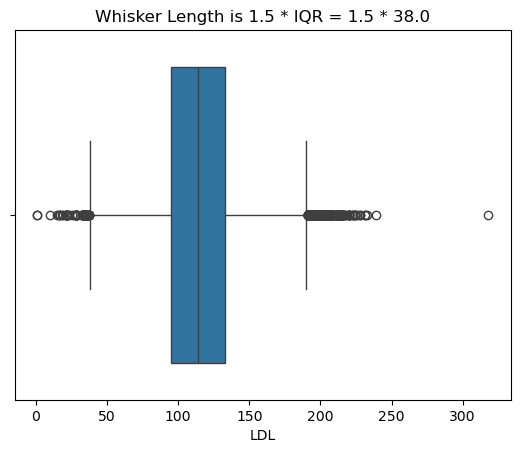

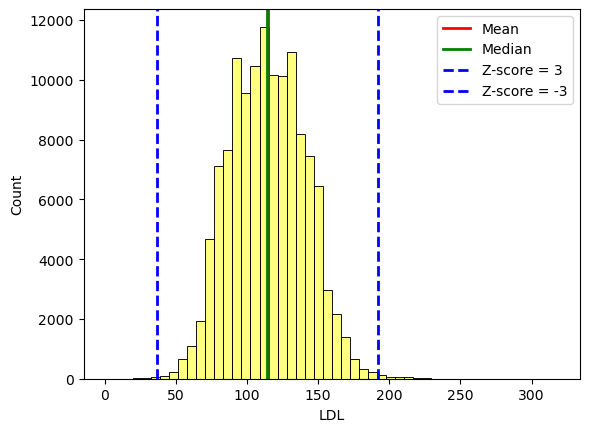

In [24]:
#Analysis After Removing Outliers

# Analyzing LDL Feature without information about the target
LDL_feature = train_df[train_df["LDL"] < 500]["LDL"]

# Central Tendency Measures
LDL_mean = LDL_feature.mean()
LDL_median = LDL_feature.median()

# Measures of Dispersion
LDL_max_val = LDL_feature.max()
LDL_min_val = LDL_feature.min()
LDL_range = LDL_max_val - LDL_min_val
LDL_std = LDL_feature.std()
LDL_skew = LDL_feature.skew()
LDL_iqr = LDL_feature.quantile(0.75) - LDL_feature.quantile(0.25)
z_score_positive3 = 3 * LDL_std + LDL_mean
z_score_negative3 = -3 * LDL_std + LDL_mean

print("LDL:")
print(f"Mean {round(LDL_mean, 3)}")
print(f"Median {round(LDL_median, 3)}")
print(f"Max Value {round(LDL_max_val, 3)}")
print(f"Min Value {round(LDL_min_val, 3)}")
print(f"Range {round(LDL_range, 3)}")
print(f"Standard Deviation {round(LDL_std, 3)}")
print(f"Skew {round(LDL_skew, 3)}")
print(f"IQR {round(LDL_iqr, 3)}")


# Box Plot for LDL Feature
sns.boxplot(x=LDL_feature)
plt.xlabel('LDL')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(LDL_iqr, 3)}")
plt.show()

# Histogram for LDL Feature
sns.histplot(LDL_feature, bins=50, alpha=0.5, color="yellow")
plt.xlabel('LDL')
plt.ylabel('Count')
plt.axvline(LDL_mean, c='red', ls='-', lw=2)
plt.axvline(LDL_median, c='green', ls='-', lw=2)
plt.axvline(z_score_positive3, c='blue', ls='--', lw=2)
plt.axvline(z_score_negative3, c='blue', ls='--', lw=2)

plt.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
plt.show()

LDL:
Mean for Non Smokers: 116.26
Standard Deviation for Non Smokers: 26.47
Mean for Smokers: 112.25
Standard Deviation for Smokers: 25.09


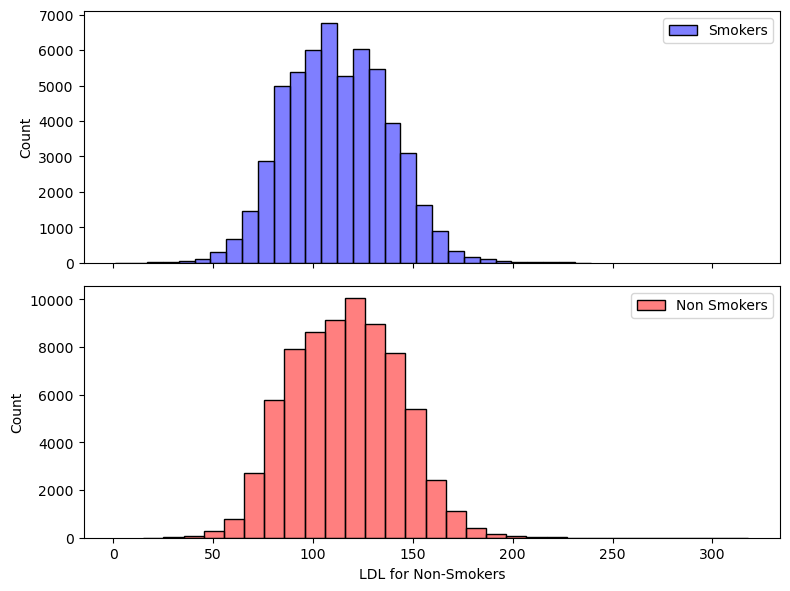

In [25]:
# Separate data for smokers and non-smokers based on 'LDL' levels
df_LDL_outliers_removed = train_df[train_df["LDL"] < 500]

LDL_smokers = df_LDL_outliers_removed[df_LDL_outliers_removed['smoking'] == 1]['LDL']
LDL_nonsmokers = df_LDL_outliers_removed[df_LDL_outliers_removed['smoking'] == 0]['LDL']

print("LDL:")
print("Mean for Non Smokers:", round(LDL_nonsmokers.mean(), 2))
print("Standard Deviation for Non Smokers:", round(LDL_nonsmokers.std(), 2))
print("Mean for Smokers:", round(LDL_smokers.mean(), 2))
print("Standard Deviation for Smokers:", round(LDL_smokers.std(),2))

# Creating subplots with two histograms stacked vertically for 'LDL' with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)  # Share x-axis between subplots

sns.histplot(data=LDL_smokers, color='blue', alpha=0.5, bins=30, label='Smokers', ax=ax1)
ax1.set_xlabel('LDL for Smokers')
ax1.legend()

sns.histplot(data=LDL_nonsmokers, color='red', alpha=0.5, bins=30, label='Non Smokers', ax=ax2)
ax2.set_xlabel('LDL for Non-Smokers')
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



### **Feature 2 : Hearing**

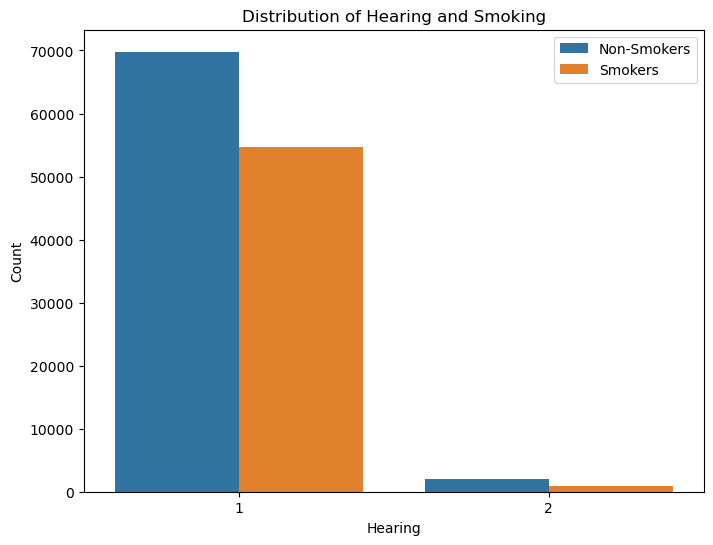

In [26]:
# Hearing Feature with respect to the target Histogram
plt.figure(figsize=(8, 6))
sns.countplot(x="hearing(right)", data=train_df, hue="smoking")
plt.xlabel('Hearing')
plt.ylabel('Count')
plt.title('Distribution of Hearing and Smoking')
plt.legend(labels=["Non-Smokers", "Smokers"])
plt.show()

+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               |   1.017 |
+--------------------+---------+
| Median             |   1     |
+--------------------+---------+
| Max Value          |   2     |
+--------------------+---------+
| Min Value          |   1     |
+--------------------+---------+
| Range              |   1     |
+--------------------+---------+
| Standard Deviation |   0.13  |
+--------------------+---------+
| Skew               |   7.403 |
+--------------------+---------+
| IQR                |   0     |
+--------------------+---------+


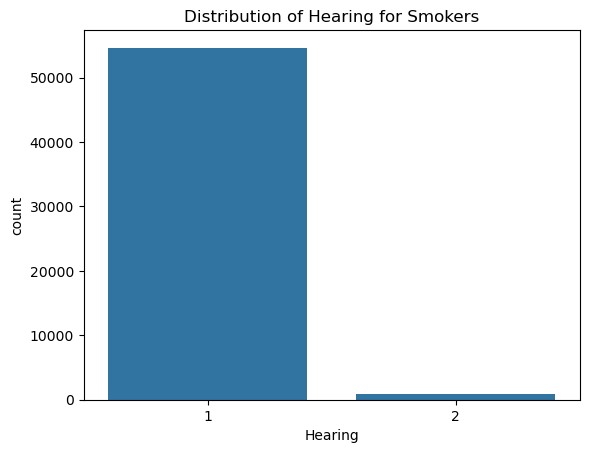

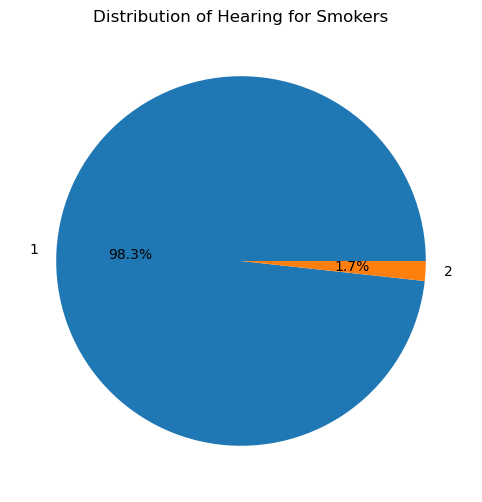

In [27]:
# Analyzing Hearing Feature for Smokers
hearing_feature = train_df[train_df["smoking"] == 1]["hearing(right)"]

# Central Tendency Measures
hearing_mean = hearing_feature.mean()
hearing_median = hearing_feature.median()

# Measures of Dispersion
hearing_max_val = hearing_feature.max()
hearing_min_val = hearing_feature.min()
hearing_range = hearing_max_val - hearing_min_val
hearing_std = hearing_feature.std()
hearing_skew = hearing_feature.skew()
hearing_iqr = hearing_feature.quantile(0.75) - hearing_feature.quantile(0.25)
z_score_positive3 = 3 * hearing_std + hearing_mean
z_score_negative3 = -3 * hearing_std + hearing_mean

# Create a list of lists to represent the table
table_data = [
    ["Mean", round(hearing_mean, 3)],
    ["Median", round(hearing_median, 3)],
    ["Max Value", round(hearing_max_val, 3)],
    ["Min Value", round(hearing_min_val, 3)],
    ["Range", round(hearing_range, 3)],
    ["Standard Deviation", round(hearing_std, 3)],
    ["Skew", round(hearing_skew, 3)],
    ["IQR", round(hearing_iqr, 3)]
]

# Print the table
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))

# Count Plot for Hearing Feature
sns.countplot(x=hearing_feature)
plt.xlabel('Hearing')
plt.title('Distribution of Hearing for Smokers')
plt.show()

# Pie Chart for Hearing Feature
plt.figure(figsize=(8, 6))
plt.pie(x=hearing_feature.value_counts(), labels=hearing_feature.value_counts().index, autopct="%.1f%%")
plt.title('Distribution of Hearing for Smokers')
plt.show()



+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               |   1.028 |
+--------------------+---------+
| Median             |   1     |
+--------------------+---------+
| Max Value          |   2     |
+--------------------+---------+
| Min Value          |   1     |
+--------------------+---------+
| Range              |   1     |
+--------------------+---------+
| Standard Deviation |   0.165 |
+--------------------+---------+
| Skew               |   5.718 |
+--------------------+---------+
| IQR                |   0     |
+--------------------+---------+


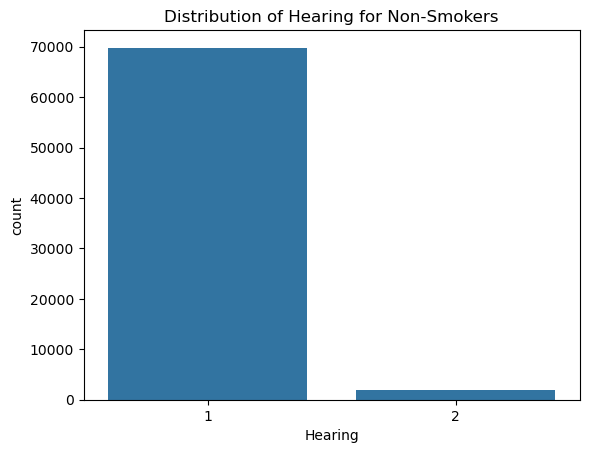

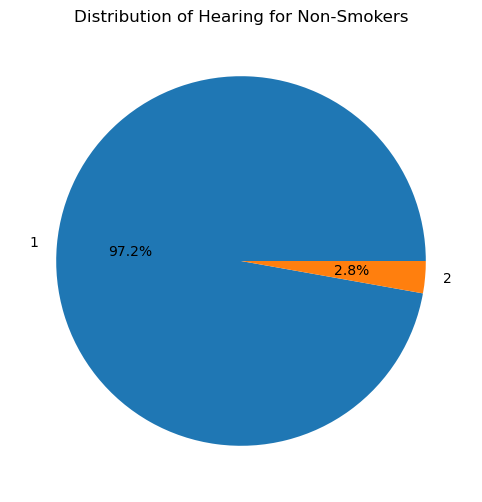

In [28]:
# Analyzing Hearing Feature for Non-Smokers
hearing_feature = train_df[train_df["smoking"] == 0]["hearing(right)"]

# Central Tendency Measures
hearing_mean = hearing_feature.mean()
hearing_median = hearing_feature.median()

# Measures of Dispersion
hearing_max_val = hearing_feature.max()
hearing_min_val = hearing_feature.min()
hearing_range = hearing_max_val - hearing_min_val
hearing_std = hearing_feature.std()
hearing_skew = hearing_feature.skew()
hearing_iqr = hearing_feature.quantile(0.75) - hearing_feature.quantile(0.25)
z_score_positive3 = 3 * hearing_std + hearing_mean
z_score_negative3 = -3 * hearing_std + hearing_mean

# Create a list of lists to represent the table
table_data = [
    ["Mean", round(hearing_mean, 3)],
    ["Median", round(hearing_median, 3)],
    ["Max Value", round(hearing_max_val, 3)],
    ["Min Value", round(hearing_min_val, 3)],
    ["Range", round(hearing_range, 3)],
    ["Standard Deviation", round(hearing_std, 3)],
    ["Skew", round(hearing_skew, 3)],
    ["IQR", round(hearing_iqr, 3)]
]

# Print the table
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))

# Count Plot for Hearing Feature
sns.countplot(x=hearing_feature)
plt.xlabel('Hearing')
plt.title('Distribution of Hearing for Non-Smokers')
plt.show()

# Pie Chart for Hearing Feature
plt.figure(figsize=(8, 6))
plt.pie(x=hearing_feature.value_counts(), labels=hearing_feature.value_counts().index, autopct="%.1f%%")
plt.title('Distribution of Hearing for Non-Smokers')
plt.show()


### **Feature 4 : Fasting Blood Sugar**

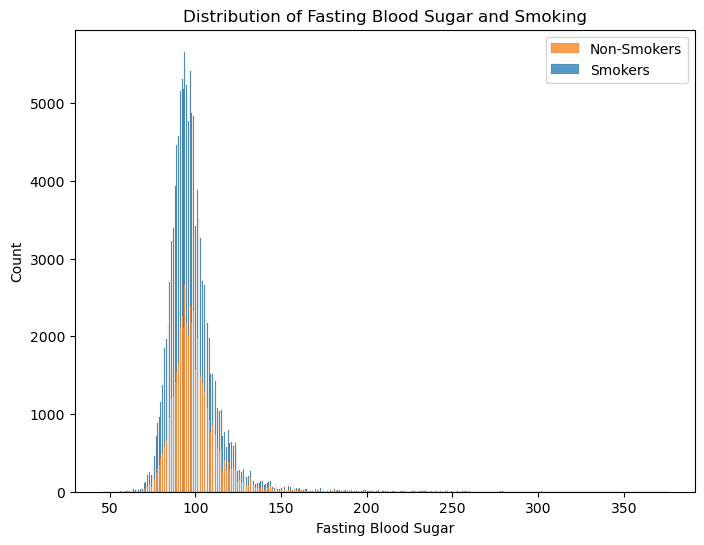

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(data=train_df, x="fasting blood sugar", hue="smoking", multiple="stack")
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.title('Distribution of Fasting Blood Sugar and Smoking')
plt.legend(labels=["Non-Smokers", "Smokers"])
plt.show()


+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               | 100.041 |
+--------------------+---------+
| Median             |  97     |
+--------------------+---------+
| Max Value          | 375     |
+--------------------+---------+
| Min Value          |  56     |
+--------------------+---------+
| Range              | 319     |
+--------------------+---------+
| Standard Deviation |  16.593 |
+--------------------+---------+
| Skew               |   3.683 |
+--------------------+---------+
| IQR                |  14     |
+--------------------+---------+


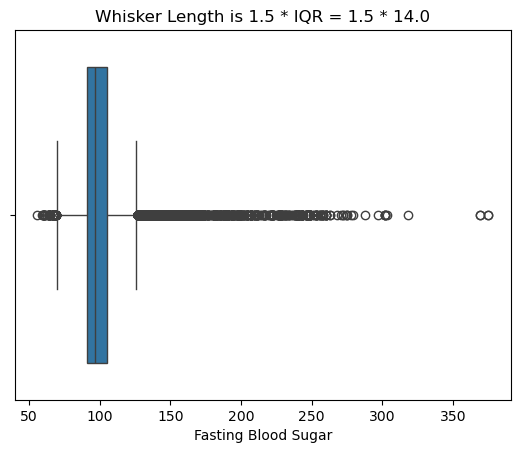

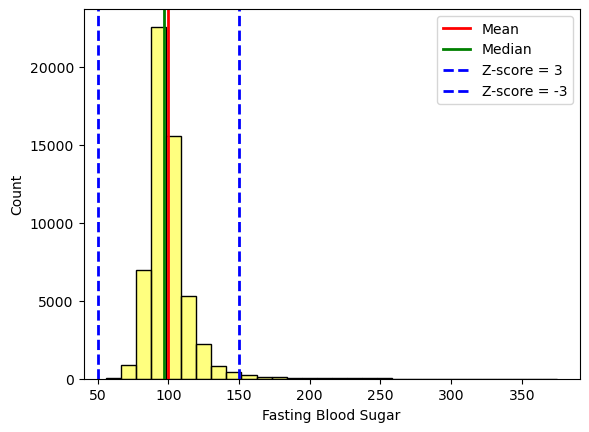

In [30]:

# Analyzing Fasting Blood Sugar Feature with smokers
fasting_blood_sugar_feature = train_df[train_df["smoking"] == 1]["fasting blood sugar"]

# Central Tendency Measures
fasting_blood_sugar_mean = fasting_blood_sugar_feature.mean()
fasting_blood_sugar_median = fasting_blood_sugar_feature.median()

# Measures of Dispersion
fasting_blood_sugar_max_val = fasting_blood_sugar_feature.max()
fasting_blood_sugar_min_val = fasting_blood_sugar_feature.min()
fasting_blood_sugar_range = fasting_blood_sugar_max_val - fasting_blood_sugar_min_val
fasting_blood_sugar_std = fasting_blood_sugar_feature.std()
fasting_blood_sugar_skew = fasting_blood_sugar_feature.skew()
fasting_blood_sugar_iqr = fasting_blood_sugar_feature.quantile(0.75) - fasting_blood_sugar_feature.quantile(0.25)
z_score_positive3 = 3 * fasting_blood_sugar_std + fasting_blood_sugar_mean
z_score_negative3 = -3 * fasting_blood_sugar_std + fasting_blood_sugar_mean

# Create a list of lists to represent the table
table_data = [
    ["Mean", round(fasting_blood_sugar_mean, 3)],
    ["Median", round(fasting_blood_sugar_median, 3)],
    ["Max Value", round(fasting_blood_sugar_max_val, 3)],
    ["Min Value", round(fasting_blood_sugar_min_val, 3)],
    ["Range", round(fasting_blood_sugar_range, 3)],
    ["Standard Deviation", round(fasting_blood_sugar_std, 3)],
    ["Skew", round(fasting_blood_sugar_skew, 3)],
    ["IQR", round(fasting_blood_sugar_iqr, 3)]
]

# Print the table
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))

# Box Plot for Fasting Blood Sugar Feature
sns.boxplot(x=fasting_blood_sugar_feature)
plt.xlabel('Fasting Blood Sugar')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(fasting_blood_sugar_iqr, 3)}")
plt.show()

# Histogram for Fasting Blood Sugar Feature
sns.histplot(fasting_blood_sugar_feature, bins=30, alpha=0.5, color="yellow")
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.axvline(fasting_blood_sugar_mean, c='red', ls='-', lw=2)
plt.axvline(fasting_blood_sugar_median, c='green', ls='-', lw=2)
plt.axvline(z_score_positive3, c='blue', ls='--', lw=2)
plt.axvline(z_score_negative3, c='blue', ls='--', lw=2)

plt.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
plt.show()



+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               |  97.009 |
+--------------------+---------+
| Median             |  95     |
+--------------------+---------+
| Max Value          | 313     |
+--------------------+---------+
| Min Value          |  46     |
+--------------------+---------+
| Range              | 267     |
+--------------------+---------+
| Standard Deviation |  14.054 |
+--------------------+---------+
| Skew               |   2.932 |
+--------------------+---------+
| IQR                |  13     |
+--------------------+---------+


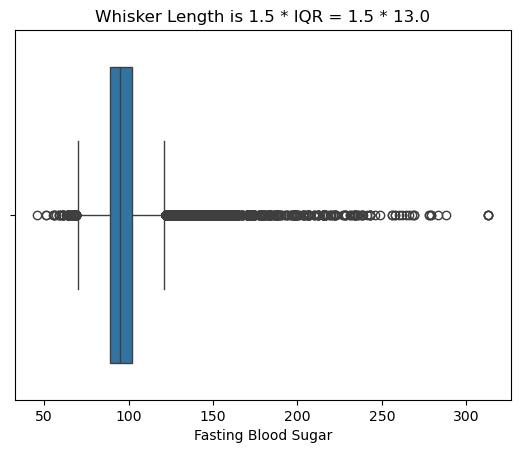

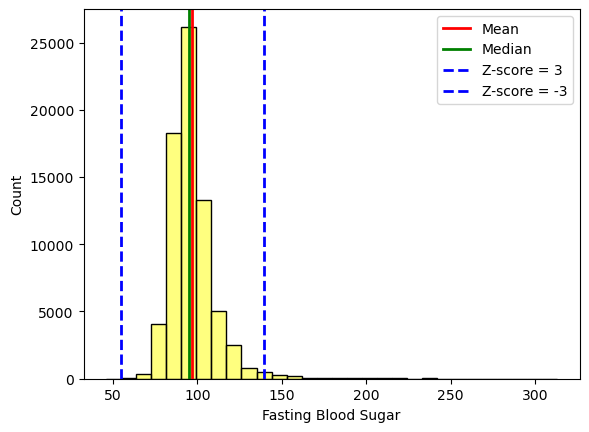

In [31]:
# Analyzing Fasting Blood Sugar Feature with non-smokers
fasting_blood_sugar_feature = train_df[train_df["smoking"] == 0]["fasting blood sugar"]

# Central Tendency Measures
fasting_blood_sugar_mean = fasting_blood_sugar_feature.mean()
fasting_blood_sugar_median = fasting_blood_sugar_feature.median()

# Measures of Dispersion
fasting_blood_sugar_max_val = fasting_blood_sugar_feature.max()
fasting_blood_sugar_min_val = fasting_blood_sugar_feature.min()
fasting_blood_sugar_range = fasting_blood_sugar_max_val - fasting_blood_sugar_min_val
fasting_blood_sugar_std = fasting_blood_sugar_feature.std()
fasting_blood_sugar_skew = fasting_blood_sugar_feature.skew()
fasting_blood_sugar_iqr = fasting_blood_sugar_feature.quantile(0.75) - fasting_blood_sugar_feature.quantile(0.25)
z_score_positive3 = 3 * fasting_blood_sugar_std + fasting_blood_sugar_mean
z_score_negative3 = -3 * fasting_blood_sugar_std + fasting_blood_sugar_mean

# Create a list of lists to represent the table
table_data = [
    ["Mean", round(fasting_blood_sugar_mean, 3)],
    ["Median", round(fasting_blood_sugar_median, 3)],
    ["Max Value", round(fasting_blood_sugar_max_val, 3)],
    ["Min Value", round(fasting_blood_sugar_min_val, 3)],
    ["Range", round(fasting_blood_sugar_range, 3)],
    ["Standard Deviation", round(fasting_blood_sugar_std, 3)],
    ["Skew", round(fasting_blood_sugar_skew, 3)],
    ["IQR", round(fasting_blood_sugar_iqr, 3)]
]

# Print the table
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))

# Box Plot for Fasting Blood Sugar Feature
sns.boxplot(x=fasting_blood_sugar_feature)
plt.xlabel('Fasting Blood Sugar')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(fasting_blood_sugar_iqr, 3)}")
plt.show()

# Histogram for Fasting Blood Sugar Feature
sns.histplot(fasting_blood_sugar_feature, bins=30, alpha=0.5, color="yellow")
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.axvline(fasting_blood_sugar_mean, c='red', ls='-', lw=2)
plt.axvline(fasting_blood_sugar_median, c='green', ls='-', lw=2)
plt.axvline(z_score_positive3, c='blue', ls='--', lw=2)
plt.axvline(z_score_negative3, c='blue', ls='--', lw=2)

plt.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
plt.show()



### **Feature 6 : Height**

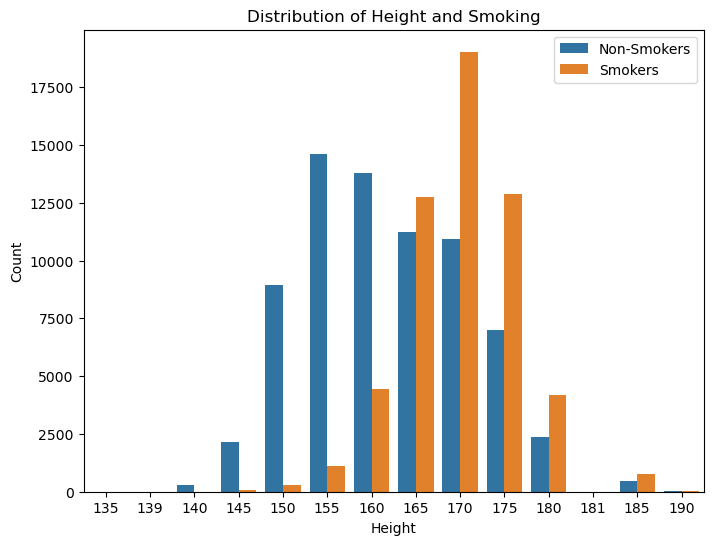

In [32]:
# Distribution of Height Feature with respect to the target

plt.figure(figsize=(8, 6))
sns.countplot(x="height(cm)", data=train_df, hue="smoking")
plt.xlabel('Height')
plt.ylabel('Count')
plt.title('Distribution of Height and Smoking')
plt.legend(labels=["Non-Smokers", "Smokers"])
plt.show()

+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               | 169.742 |
+--------------------+---------+
| Median             | 170     |
+--------------------+---------+
| Max Value          | 190     |
+--------------------+---------+
| Min Value          | 135     |
+--------------------+---------+
| Range              |  55     |
+--------------------+---------+
| Standard Deviation |   6.15  |
+--------------------+---------+
| Skew               |  -0.251 |
+--------------------+---------+
| IQR                |  10     |
+--------------------+---------+


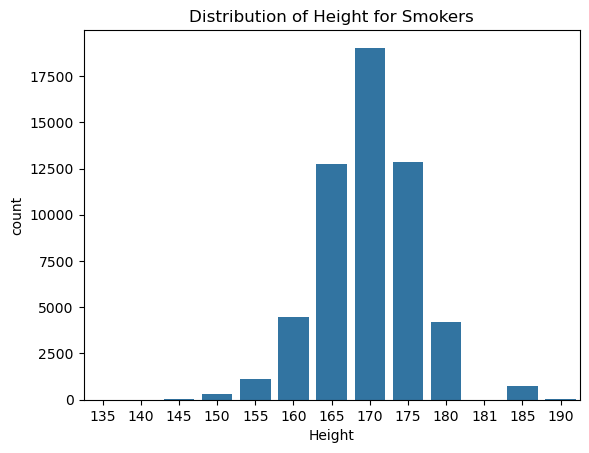

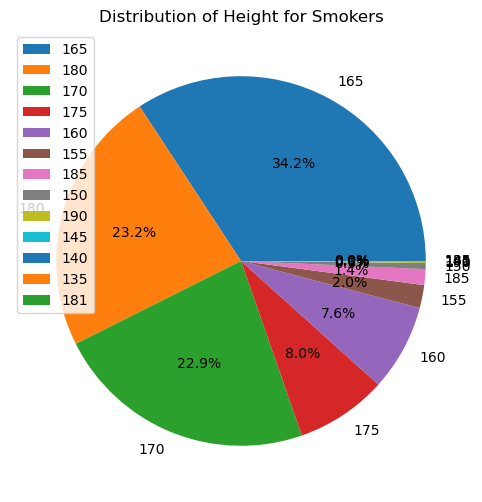

In [33]:
# Analyzing Height Feature with smokers
height_feature = train_df[train_df["smoking"] == 1]["height(cm)"]

# Central Tendency Measures
height_mean = height_feature.mean()
height_median = height_feature.median()

# Measures of Dispersion
height_max_val = height_feature.max()
height_min_val = height_feature.min()
height_range = height_max_val - height_min_val
height_std = height_feature.std()
height_skew = height_feature.skew()
height_iqr = height_feature.quantile(0.75) - height_feature.quantile(0.25)
z_score_positive3 = 3 * height_std + height_mean
z_score_negative3 = -3 * height_std + height_mean

# Create a list of lists to represent the table
table_data = [
    ["Mean", round(height_mean, 3)],
    ["Median", round(height_median, 3)],
    ["Max Value", round(height_max_val, 3)],
    ["Min Value", round(height_min_val, 3)],
    ["Range", round(height_range, 3)],
    ["Standard Deviation", round(height_std, 3)],
    ["Skew", round(height_skew, 3)],
    ["IQR", round(height_iqr, 3)]
]

# Print the table
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))

# Bar Plot for Height Feature
sns.countplot(x=height_feature)
plt.xlabel('Height')
plt.title('Distribution of Height for Smokers')
plt.show()

# Pie Chart for Height Feature for Smokers
plt.figure(figsize=(8, 6))
plt.pie(x=height_feature.value_counts(), autopct="%.1f%%", labels=height_feature.unique())
plt.title('Distribution of Height for Smokers')
plt.legend(labels=height_feature.unique())
plt.show()

+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               | 161.793 |
+--------------------+---------+
| Median             | 160     |
+--------------------+---------+
| Max Value          | 190     |
+--------------------+---------+
| Min Value          | 135     |
+--------------------+---------+
| Range              |  55     |
+--------------------+---------+
| Standard Deviation |   9.014 |
+--------------------+---------+
| Skew               |   0.192 |
+--------------------+---------+
| IQR                |  15     |
+--------------------+---------+


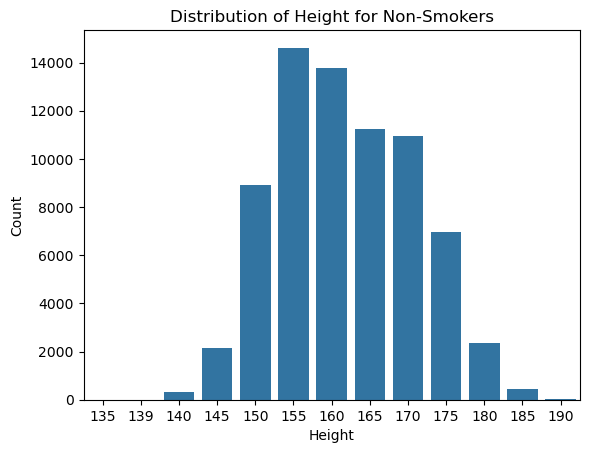

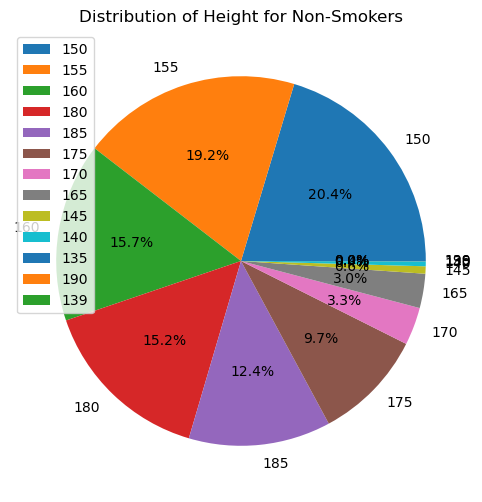

In [34]:
# Analyzing Height Feature with non-smokers
height_feature = train_df[train_df["smoking"] == 0]["height(cm)"]

# Central Tendency Measures
height_mean = height_feature.mean()
height_median = height_feature.median()

# Measures of Dispersion
height_max_val = height_feature.max()
height_min_val = height_feature.min()
height_range = height_max_val - height_min_val
height_std = height_feature.std()
height_skew = height_feature.skew()
height_iqr = height_feature.quantile(0.75) - height_feature.quantile(0.25)
z_score_positive3 = 3 * height_std + height_mean
z_score_negative3 = -3 * height_std + height_mean

# Create a list of lists to represent the table
table_data = [
    ["Mean", round(height_mean, 3)],
    ["Median", round(height_median, 3)],
    ["Max Value", round(height_max_val, 3)],
    ["Min Value", round(height_min_val, 3)],
    ["Range", round(height_range, 3)],
    ["Standard Deviation", round(height_std, 3)],
    ["Skew", round(height_skew, 3)],
    ["IQR", round(height_iqr, 3)]
]

# Print the table
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))

# Count plot for Height Feature
sns.countplot(x=height_feature)
plt.xlabel('Height')
plt.ylabel('Count')
plt.title('Distribution of Height for Non-Smokers')
plt.show()

# Pie plot for a height feature for non-smokers
plt.figure(figsize=(8, 6))
plt.pie(x=height_feature.value_counts(), autopct="%.1f%%", labels=height_feature.unique())
plt.title('Distribution of Height for Non-Smokers')
plt.legend(labels=height_feature.unique())
plt.show()






### **Feature 7: Weight**

Observations: Weights are approximately Gaussian, but they are skewed to the right
Weights are on average higher for smokers, and their distribution is less skewed

Weight(kg):
Mean 67.109
Median 65.0
Max Value 130
Min Value 30
Range 100
Standard Deviation 12.565
Skew 0.379
IQR 15.0


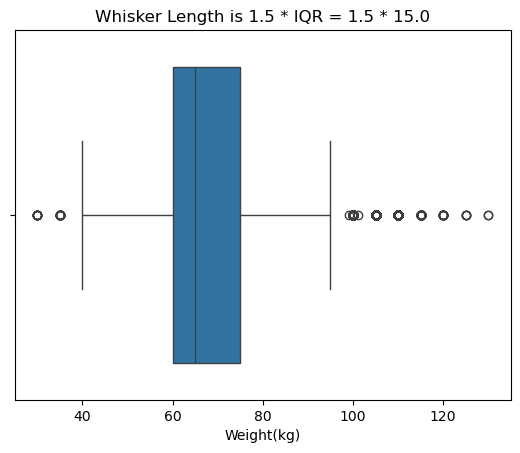

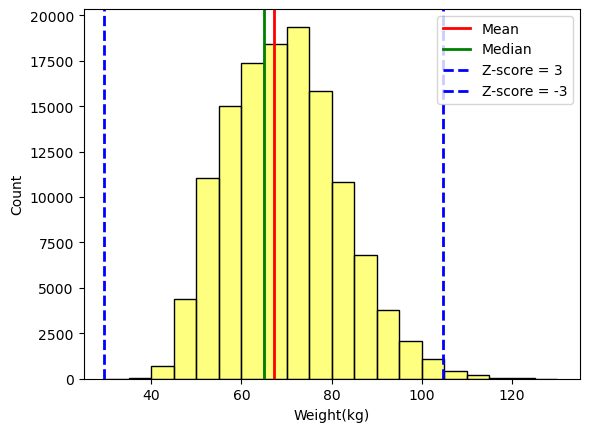

In [35]:
weight_feature = train_df["weight(kg)"]

# Central Tendency Measures
weight_mean = weight_feature.mean()
weight_median = weight_feature.median()

# Measures of Dispersion
weight_max_val = weight_feature.max()
weight_min_val = weight_feature.min()
weight_range = weight_max_val - weight_min_val
weight_std = weight_feature.std()
weight_skew = weight_feature.skew()
weight_iqr = weight_feature.quantile(0.75) - weight_feature.quantile(0.25)
z_score_positive3 = 3 * weight_std + weight_mean
z_score_negative3 = -3 * weight_std + weight_mean

print("Weight(kg):")
print(f"Mean {round(weight_mean, 3)}")
print(f"Median {round(weight_median, 3)}")
print(f"Max Value {round(weight_max_val, 3)}")
print(f"Min Value {round(weight_min_val, 3)}")
print(f"Range {round(weight_range, 3)}")
print(f"Standard Deviation {round(weight_std, 3)}")
print(f"Skew {round(weight_skew, 3)}")
print(f"IQR {round(weight_iqr, 3)}")


# Box Plot for Weight(kg) Feature
sns.boxplot(x=weight_feature)
plt.xlabel('Weight(kg)')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(weight_iqr, 3)}")
plt.show()

# Histogram for Weight(kg) Feature
sns.histplot(weight_feature, bins=20, alpha=0.5, color="yellow")
plt.xlabel('Weight(kg)')
plt.ylabel('Count')
plt.axvline(weight_mean, c='red', ls='-', lw=2)
plt.axvline(weight_median, c='green', ls='-', lw=2)
plt.axvline(z_score_positive3, c='blue', ls='--', lw=2)
plt.axvline(z_score_negative3, c='blue', ls='--', lw=2)

plt.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
plt.show()


Average Weight for Smokers: 72.13 kg
Median Weight for Smokers: 70.00 kg
Average Weight for Non-Smokers: 63.22 kg
Median Weight for Non-Smokers: 60.00 kg


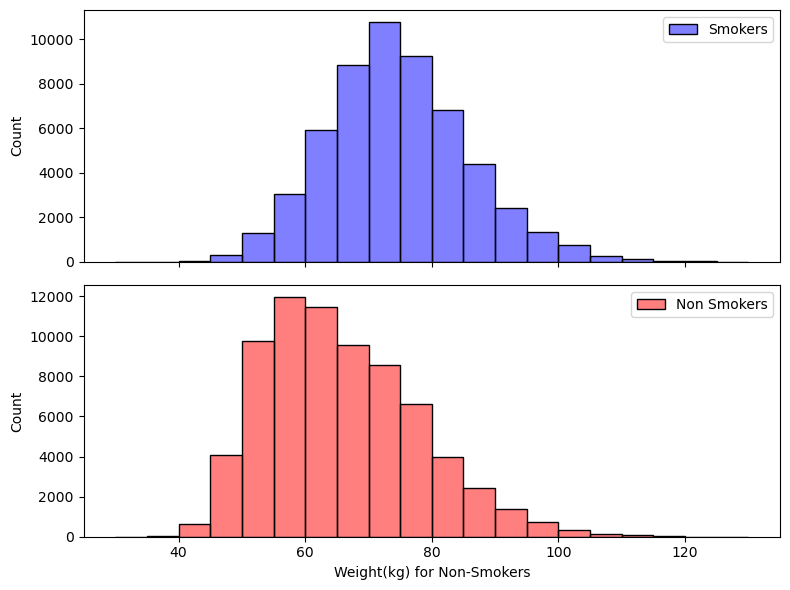

In [36]:
# Separate data for smokers and non-smokers based on 'weight(kg)' levels
weight_smokers = train_df[train_df['smoking'] == 1]['weight(kg)']
weight_nonsmokers = train_df[train_df['smoking'] == 0]['weight(kg)']

# Creating subplots with two histograms stacked vertically for 'Weight(kg)' with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)  # Share x-axis between subplots

avg_weight_smokers = weight_smokers.mean()
median_smokers = weight_smokers.median()
avg_weight_nonsmokers = weight_nonsmokers.mean()
median_nonsmokers = weight_nonsmokers.median()

# Print average weights
print(f"Average Weight for Smokers: {avg_weight_smokers:.2f} kg")
print(f"Median Weight for Smokers: {median_smokers:.2f} kg")
print(f"Average Weight for Non-Smokers: {avg_weight_nonsmokers:.2f} kg")
print(f"Median Weight for Non-Smokers: {median_nonsmokers:.2f} kg")

sns.histplot(data=weight_smokers, color='blue', alpha=0.5, bins=20, label='Smokers', ax=ax1)
ax1.set_xlabel('Weight(kg) for Smokers')
ax1.legend()

sns.histplot(data=weight_nonsmokers, color='red', alpha=0.5, bins=20, label='Non Smokers', ax=ax2)
ax2.set_xlabel('Weight(kg) for Non-Smokers')
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### **Feature 8: Cholesterol**

Descriptive Statistics for Cholesterol:
Mean: 195.79207874164075
Median: 196.0
Standard Deviation: 28.405790681876233
Minimum Value: 77
Maximum Value: 393
Skewness: 0.04096447796784706
IQR 42.0


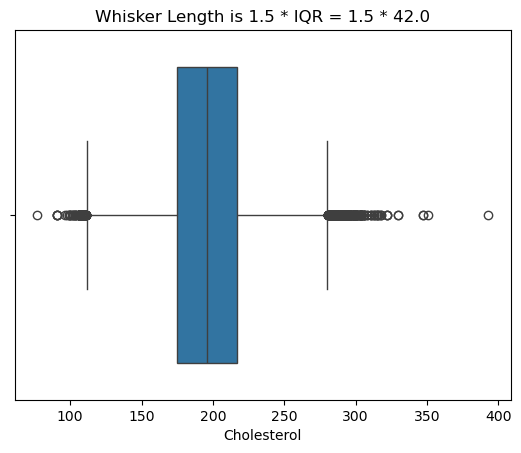

In [37]:
# Descriptive Statistics of the Choleterol feature
cholesterol_mean = train_df['Cholesterol'].mean()
cholesterol_median = train_df['Cholesterol'].median()
cholesterol_std = train_df['Cholesterol'].std()
cholesterol_min = train_df['Cholesterol'].min()
cholesterol_max = train_df['Cholesterol'].max()
cholesterol_iqr = train_df['Cholesterol'].quantile(0.75) - train_df['Cholesterol'].quantile(0.25)
z_score_pos3 = 3 * cholesterol_std + cholesterol_mean
z_score_neg3 = -3 * cholesterol_std + cholesterol_mean

# Print the descriptive statistics
print("Descriptive Statistics for Cholesterol:")
print(f"Mean: {cholesterol_mean}")
print(f"Median: {cholesterol_median}")
print(f"Standard Deviation: {cholesterol_std}")
print(f"Minimum Value: {cholesterol_min}")
print(f"Maximum Value: {cholesterol_max}")
#skewness
print("Skewness:", train_df['Cholesterol'].skew())
#iqr
print(f"IQR {round(cholesterol_iqr, 3)}")


# Box Plot for Hemoglobin Feature
sns.boxplot(x=train_df['Cholesterol'])
plt.xlabel('Cholesterol')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(cholesterol_iqr, 3)}")
plt.show()

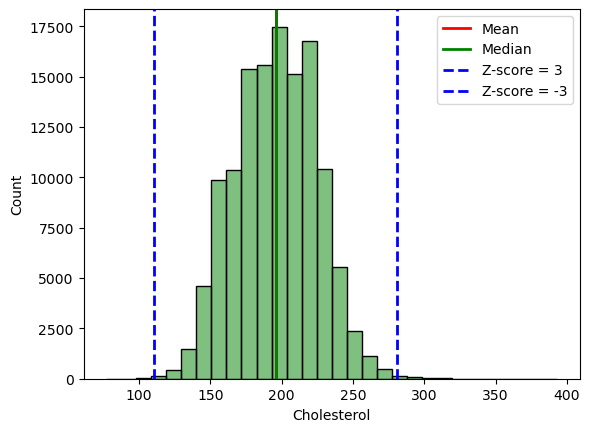

In [38]:
#Histogram for Cholesterol feature
sns.histplot(train_df['Cholesterol'], bins=30, alpha=0.5, color="green")
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.axvline(cholesterol_mean, c='red', ls='-', lw=2)
plt.axvline(cholesterol_median, c='green', ls='-', lw=2)
plt.axvline(z_score_pos3, c='blue', ls='--', lw=2)
plt.axvline(z_score_neg3, c='blue', ls='--', lw=2)

plt.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
plt.show()

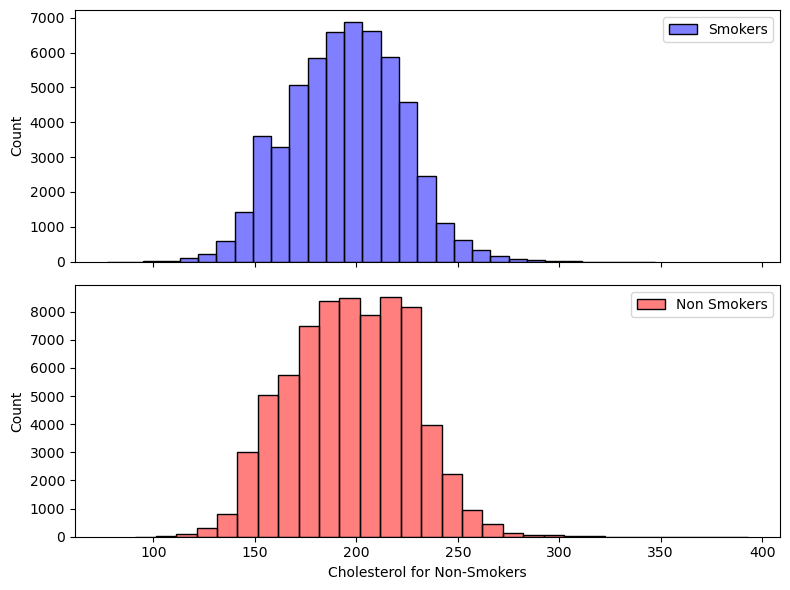

In [39]:
# Analyzing Cholesterol Feature with respect to the target
Cholesterol_smokers = train_df[train_df['smoking'] == 1]['Cholesterol']
Cholesterol_nonsmokers = train_df[train_df['smoking'] == 0]['Cholesterol']

# Creating subplots for Choleterol feature
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)  # Share x-axis between subplots

sns.histplot(data=Cholesterol_smokers, color='blue', alpha=0.5, bins=30, label='Smokers', ax=ax1)
ax1.set_xlabel('Cholesterol for Smokers')
ax1.legend()

sns.histplot(data=Cholesterol_nonsmokers, color='red', alpha=0.5, bins=30, label='Non Smokers', ax=ax2)
ax2.set_xlabel('Cholesterol for Non-Smokers')
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
plt.show()

### **Feature 9: serum creatinine**

In [40]:
# Descriptive statistics of the serum creatinine feature
serum_creatinine_mean = train_df['serum creatinine'].mean()
serum_creatinine_median = train_df['serum creatinine'].median()
serum_creatinine_std = train_df['serum creatinine'].std()
serum_creatinine_min = train_df['serum creatinine'].min()
serum_creatinine_max = train_df['serum creatinine'].max()
serum_creatinine_iqr = train_df['serum creatinine'].quantile(0.75) - train_df['serum creatinine'].quantile(0.25)
serum_creatinine_skew = train_df['serum creatinine'].skew()
serum_creatinine_kurtosis = train_df['serum creatinine'].kurtosis() #measure taildness of the distribution
serum_creatinine_z_score_pos3 = 3 * serum_creatinine_std + serum_creatinine_mean
serum_creatinine_z_score_neg3 = -3 * serum_creatinine_std + serum_creatinine_mean

# Print the descriptive statistics
print("Descriptive Statistics for Serum Creatinine:  ")
print(f"Mean: {serum_creatinine_mean}")
print(f"Median: {serum_creatinine_median}")
print(f"Standard Deviation: {serum_creatinine_std}")
print(f"Minimum Value: {serum_creatinine_min}")
print(f"Maximum Value: {serum_creatinine_max}")
print(f"IQR: {serum_creatinine_iqr}")
print(f"Skewness: {serum_creatinine_skew}")
print(f"Kurtosis: {serum_creatinine_kurtosis}")
print(f"Z-score for 3 std above mean: {serum_creatinine_z_score_pos3}")
print(f"Z-score for 3 std below mean: {serum_creatinine_z_score_neg3}")


Descriptive Statistics for Serum Creatinine:  
Mean: 0.8928557973062072
Median: 0.9
Standard Deviation: 0.18006845185364784
Minimum Value: 0.1
Maximum Value: 9.9
IQR: 0.19999999999999996
Skewness: 1.8309247414483043
Kurtosis: 72.3607968702462
Z-score for 3 std above mean: 1.4330611528671509
Z-score for 3 std below mean: 0.3526504417452637


 High kurtosis suggests the presence of outliers or heavy tails in this feature.

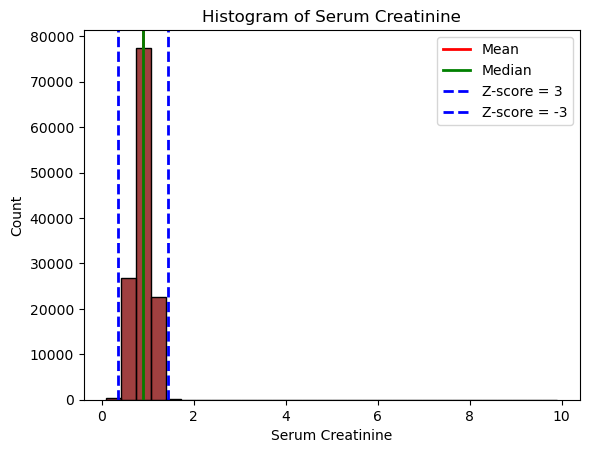

In [41]:
# Plot histogram of serum creatinine feature
sns.histplot(train_df['serum creatinine'], bins=30, color="maroon")
plt.xlabel('Serum Creatinine')
plt.ylabel('Count')
plt.axvline(serum_creatinine_mean, c='red', ls='-', lw=2)
plt.axvline(serum_creatinine_median, c='green', ls='-', lw=2)
plt.axvline(serum_creatinine_z_score_pos3, c='blue', ls='--', lw=2)
plt.axvline(serum_creatinine_z_score_neg3, c='blue', ls='--', lw=2)

plt.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])

plt.title('Histogram of Serum Creatinine')
plt.show()



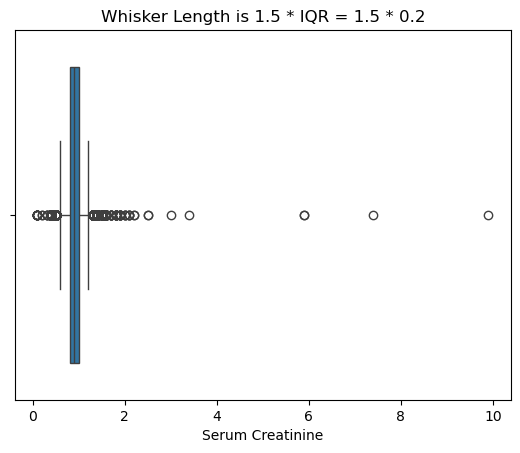

In [42]:
sns.boxplot(x=train_df['serum creatinine'])
plt.xlabel('Serum Creatinine')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(serum_creatinine_iqr, 3)}")
plt.show()

In [43]:
#Analysis after removing the skewed data
serum_creatinine_feature = train_df[train_df['serum creatinine'] < 2.5]['serum creatinine']

# Central Tendency Measures
serum_creatinine_mean = serum_creatinine_feature.mean()
serum_creatinine_median = serum_creatinine_feature.median()
serum_creatinine_iqr = serum_creatinine_feature.quantile(0.75) - serum_creatinine_feature.quantile(0.25)
serum_creatinine_std = serum_creatinine_feature.std()
serum_creatinine_skew = serum_creatinine_feature.skew()
serum_creatinine_kurtosis = serum_creatinine_feature.kurtosis()
serum_creatinine_z_score_pos3 = 3 * serum_creatinine_std + serum_creatinine_mean
serum_creatinine_z_score_neg3 = -3 * serum_creatinine_std + serum_creatinine_mean

# Create a list of lists to represent the table
table_data = [
    ["Mean", round(serum_creatinine_mean, 3)],
    ["Median", round(serum_creatinine_median, 3)],
    ["Standard Deviation", round(serum_creatinine_std, 3)],
    ["IQR", round(serum_creatinine_iqr, 3)],
    ["Skew", round(serum_creatinine_skew, 3)],
    ["Kurtosis", round(serum_creatinine_kurtosis, 3)],
    ["Z-score for 3 std above mean", round(serum_creatinine_z_score_pos3, 3)],
    ["Z-score for 3 std below mean", round(serum_creatinine_z_score_neg3, 3)]
]
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))




+------------------------------+---------+
| Statistic                    |   Value |
+==============================+=========+
| Mean                         |   0.893 |
+------------------------------+---------+
| Median                       |   0.9   |
+------------------------------+---------+
| Standard Deviation           |   0.176 |
+------------------------------+---------+
| IQR                          |   0.2   |
+------------------------------+---------+
| Skew                         |   0.107 |
+------------------------------+---------+
| Kurtosis                     |   0.193 |
+------------------------------+---------+
| Z-score for 3 std above mean |   1.42  |
+------------------------------+---------+
| Z-score for 3 std below mean |   0.365 |
+------------------------------+---------+


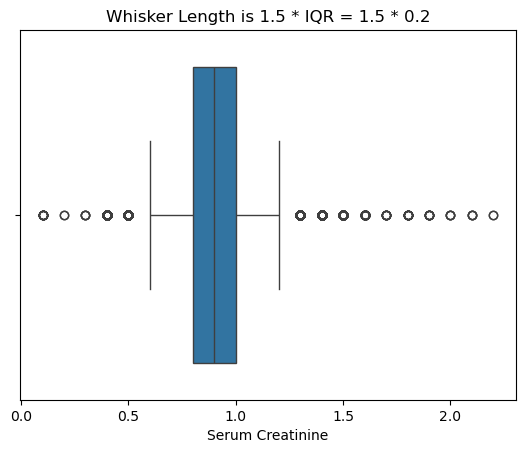

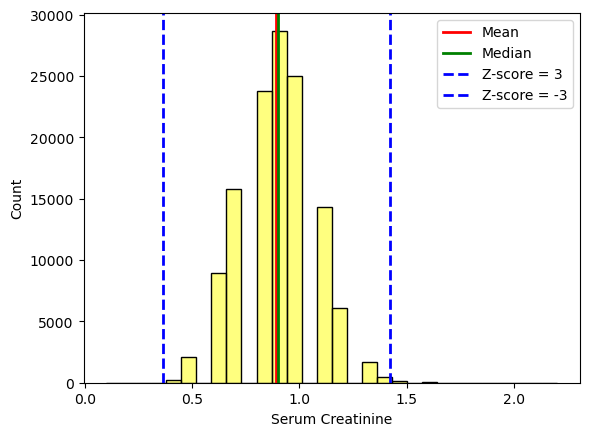

In [44]:
#boxplot after removing skewed data
sns.boxplot(x=serum_creatinine_feature)
plt.xlabel('Serum Creatinine')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(serum_creatinine_iqr, 3)}")
plt.show()

#barplot after removing skewed data
sns.histplot(serum_creatinine_feature, bins=30, alpha=0.5, color="yellow")
plt.xlabel('Serum Creatinine')
plt.ylabel('Count')
plt.axvline(serum_creatinine_mean, c='red', ls='-', lw=2)
plt.axvline(serum_creatinine_median, c='green', ls='-', lw=2)
plt.axvline(serum_creatinine_z_score_pos3, c='blue', ls='--', lw=2)
plt.axvline(serum_creatinine_z_score_neg3, c='blue', ls='--', lw=2)

plt.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
plt.show()

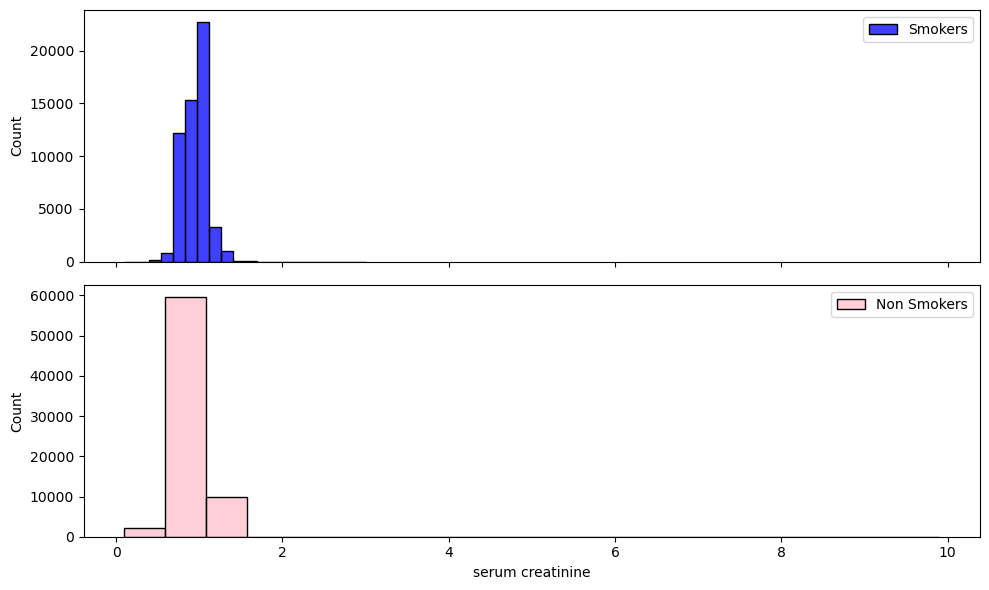

Analysis of Serum Creatinine with repect to Non Smokers:
Mean: 0.85
Standard Deviation: 0.19
Mean: 0.85
Standard Deviation: 0.19
Skewness: 2.9
Kurtosis: 101.82


Analysis of Serum Creatinine with repect to Smokers:
Mean: 0.95
Standard Deviation: 0.15
Mean: 0.95
Standard Deviation: 0.15
Skewness: 0.19
Kurtosis: 1.59


In [45]:
#serum creatinine feature with respect to the target variable
serum_creatinine_smokers = train_df[train_df['smoking'] == 1]['serum creatinine']
serum_creatinine_nonsmokers = train_df[train_df['smoking'] == 0]['serum creatinine']

# Creating subplots for serum creatinine feature
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)  

sns.histplot(data=serum_creatinine_smokers, color='blue', bins=20, label='Smokers', ax=ax1)
ax1.legend()

sns.histplot(data=serum_creatinine_nonsmokers, color='pink', bins=20, label='Non Smokers', ax=ax2)
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Descriptive statistics of the serum creatinine feature

print("Analysis of Serum Creatinine with repect to Non Smokers:")
print("Mean:", round(serum_creatinine_nonsmokers.mean(), 2))
print("Standard Deviation:", round(serum_creatinine_nonsmokers.std(), 2))
print("Mean:", round(serum_creatinine_nonsmokers.mean(), 2))
print("Standard Deviation:", round(serum_creatinine_nonsmokers.std(), 2))
print("Skewness:", round(serum_creatinine_nonsmokers.skew(), 2))
print("Kurtosis:", round(serum_creatinine_nonsmokers.kurtosis(), 2))

print("\n")

print("Analysis of Serum Creatinine with repect to Smokers:")
print("Mean:", round(serum_creatinine_smokers.mean(), 2))
print("Standard Deviation:", round(serum_creatinine_smokers.std(), 2))
print("Mean:", round(serum_creatinine_smokers.mean(), 2))
print("Standard Deviation:", round(serum_creatinine_smokers.std(), 2))
print("Skewness:", round(serum_creatinine_smokers.skew(), 2))
print("Kurtosis:", round(serum_creatinine_smokers.kurtosis(), 2))

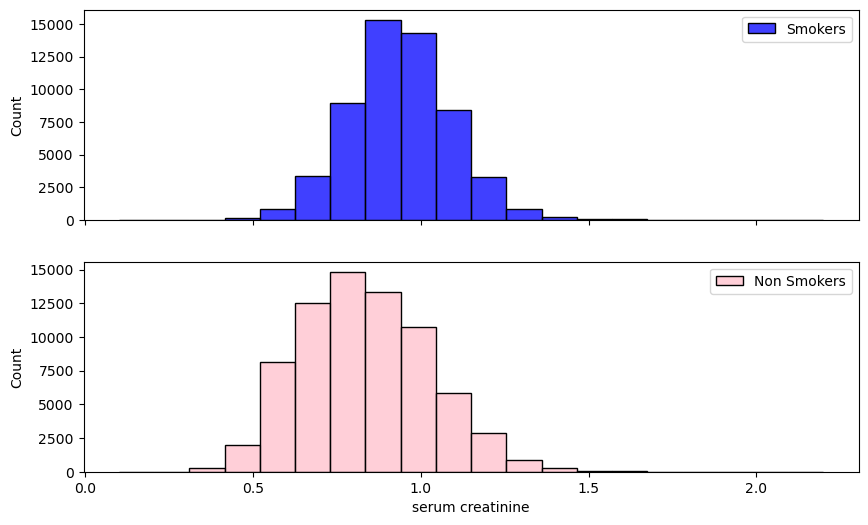

Analysis of Serum Creatinine with repect to Smokers:
+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               |    0.95 |
+--------------------+---------+
| Standard Deviation |    0.15 |
+--------------------+---------+
| Median             |    0.9  |
+--------------------+---------+
| Standard Deviation |    0.15 |
+--------------------+---------+
| Skewness           |    0.12 |
+--------------------+---------+
| Kurtosis           |    0.7  |
+--------------------+---------+


Analysis of Serum Creatinine with repect to nonsmokers:
+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               |    0.85 |
+--------------------+---------+
| Standard Deviation |    0.18 |
+--------------------+---------+
| Median             |    0.8  |
+--------------------+---------+
| Standard Deviation |    0.18 |
+--------------------+---------+
| Skewness           |    0.38 

In [46]:
#Analyzing with respect to target variable after removing outliers
serum_creatinine_df = train_df[train_df['serum creatinine'] < 2.5]
serum_smokers = serum_creatinine_df[serum_creatinine_df['smoking'] == 1]['serum creatinine']
serum_nonsmokers = serum_creatinine_df[serum_creatinine_df['smoking'] == 0]['serum creatinine']

# Creating subplots for serum creatinine feature
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
sns.histplot(data=serum_smokers, color='blue', bins=20, label='Smokers', ax=ax1)
ax1.legend()

sns.histplot(data=serum_nonsmokers, color='pink', bins=20, label='Non Smokers', ax=ax2)
ax2.legend()

plt.tight_layout
plt.show()

# Descriptive statistics of the serum creatinine feature
print("Analysis of Serum Creatinine with repect to Smokers:")
table_data = [
    ["Mean", round(serum_smokers.mean(), 2)],
    ["Standard Deviation", round(serum_smokers.std(), 2)],
    ["Median", round(serum_smokers.median(), 2)],
    ["Standard Deviation", round(serum_smokers.std(), 2)],
    ["Skewness", round(serum_smokers.skew(), 2)],
    ["Kurtosis", round(serum_smokers.kurtosis(), 2)]

]
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))

print("\n")

print("Analysis of Serum Creatinine with repect to nonsmokers:")
table_data=[
    ["Mean", round(serum_nonsmokers.mean(), 2)],
    ["Standard Deviation", round(serum_nonsmokers.std(), 2)],
    ["Median", round(serum_nonsmokers.median(), 2)],
    ["Standard Deviation", round(serum_nonsmokers.std(), 2)],
    ["Skewness", round(serum_nonsmokers.skew(), 2)],
    ["Kurtosis", round(serum_nonsmokers.kurtosis(), 2)]
]
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))

### **Feature 10: Gtp**

In [47]:
#descriptive statistics of the Gtp feature
gtp_mean = train_df['Gtp'].mean()
gtp_median = train_df['Gtp'].median()
gtp_std = train_df['Gtp'].std()
gtp_min = train_df['Gtp'].min()
gtp_max = train_df['Gtp'].max()
gtp_iqr = train_df['Gtp'].quantile(0.75) - train_df['Gtp'].quantile(0.25)
gtp_skew = train_df['Gtp'].skew()
gtp_kurtosis = train_df['Gtp'].kurtosis() #measure taildness of the distribution
gtp_z_score_pos3 = 3 * gtp_std + gtp_mean
gtp_z_score_neg3 = -3 * gtp_std + gtp_mean

print("Descriptive Statistics for Gtp:  ")
print(f"Mean: {gtp_mean}")
print(f"Median: {gtp_median}")
print(f"Standard Deviation: {gtp_std}")
print(f"Minimum Value: {gtp_min}")
print(f"Maximum Value: {gtp_max}")
print(f"IQR: {gtp_iqr}")
print(f"Skewness: {gtp_skew}")
print(f"Kurtosis: {gtp_kurtosis}")
print(f"Z-score for 3 std above mean: {gtp_z_score_pos3}")
print(f"Z-score for 3 std below mean: {gtp_z_score_neg3}")



Descriptive Statistics for Gtp:  
Mean: 36.16566198863458
Median: 27.0
Standard Deviation: 31.181943739331544
Minimum Value: 2
Maximum Value: 999
IQR: 26.0
Skewness: 5.475593063546785
Kurtosis: 71.87277174710093
Z-score for 3 std above mean: 129.7114932066292
Z-score for 3 std below mean: -57.38016922936005


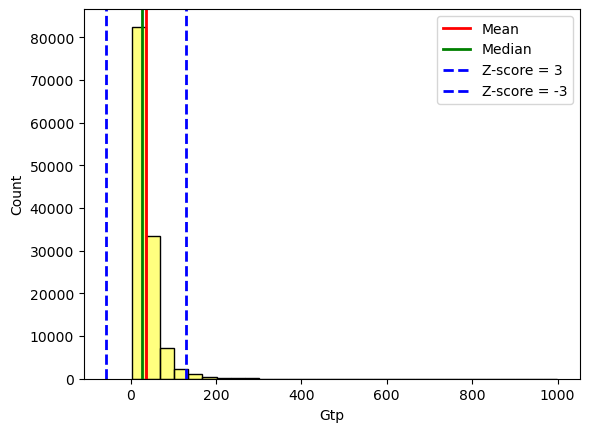

In [48]:
#histogram of Gtp feature without the target
sns.histplot(train_df['Gtp'], bins=30, alpha=0.5, color="yellow")
plt.xlabel('Gtp')
plt.ylabel('Count')
plt.axvline(gtp_mean, c='red', ls='-', lw=2)
plt.axvline(gtp_median, c='green', ls='-', lw=2)
plt.axvline(gtp_z_score_pos3, c='blue', ls='--', lw=2)
plt.axvline(gtp_z_score_neg3, c='blue', ls='--', lw=2)

plt.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
plt.show()

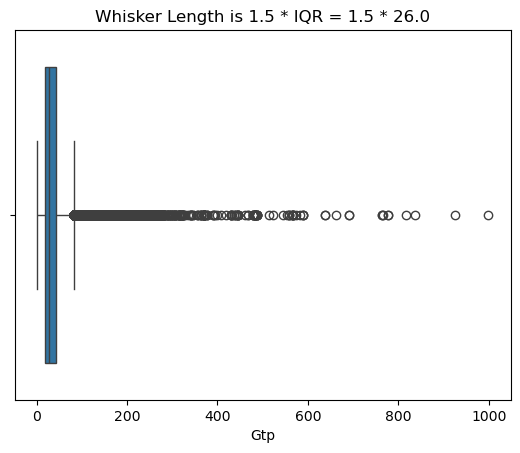

In [49]:
#boxplot of Gtp feature without the target
sns.boxplot(x=train_df['Gtp'])
plt.xlabel('Gtp')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(gtp_iqr, 3)}")
plt.show()


Descriptive Statistics for Gtp:  
+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               |   34.19 |
+--------------------+---------+
| Standard Deviation |   22.91 |
+--------------------+---------+
| Median             |   27    |
+--------------------+---------+
| Standard Deviation |   22.91 |
+--------------------+---------+
| Skewness           |    1.79 |
+--------------------+---------+
| Kurtosis           |    3.84 |
+--------------------+---------+


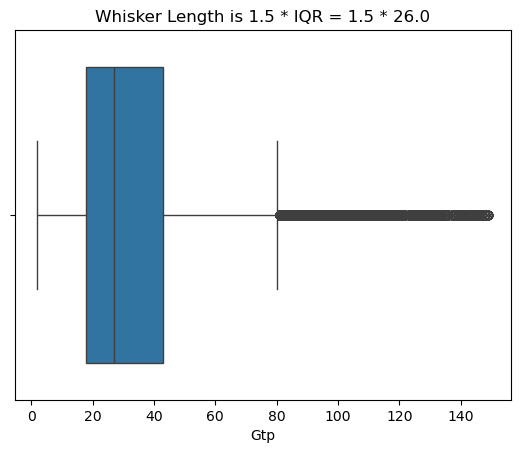

In [50]:
#removing outliers in the Gtp feature
gtp_feature = train_df[train_df['Gtp'] < 150]['Gtp']

# Central Tendency Measures
table_data=[
    ["Mean", round(gtp_feature.mean(), 2)],
    ["Standard Deviation", round(gtp_feature.std(), 2)],
    ["Median", round(gtp_feature.median(), 2)],
    ["Standard Deviation", round(gtp_feature.std(), 2)],
    ["Skewness", round(gtp_feature.skew(), 2)],
    ["Kurtosis", round(gtp_feature.kurtosis(), 2)]
]

print("Descriptive Statistics for Gtp:  ")
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))

#boxplot of Gtp feature without the target
sns.boxplot(x=gtp_feature)
plt.xlabel('Gtp')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(gtp_iqr, 3)}")
plt.show()

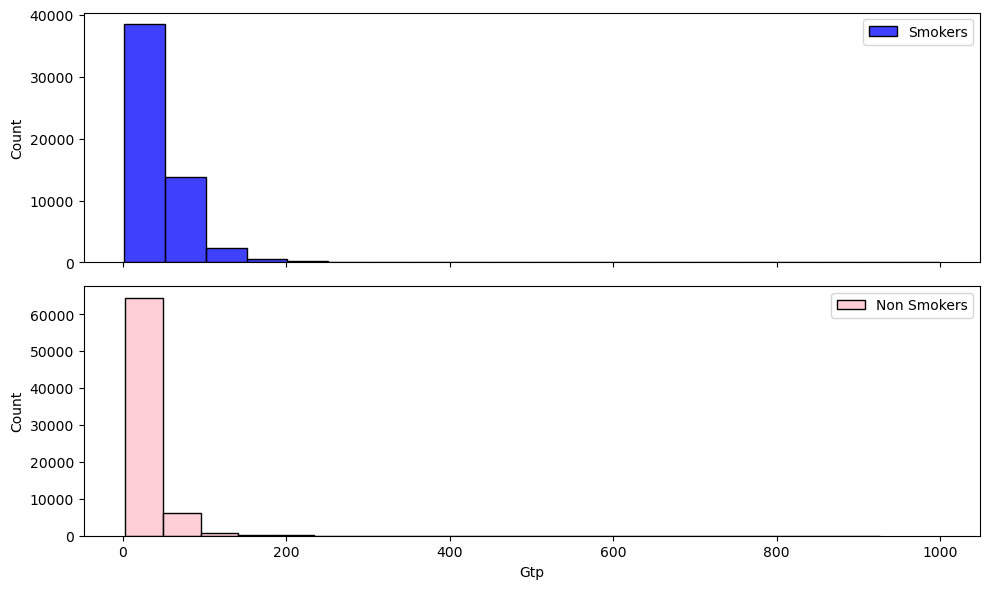

Analysis of Serum Creatinine with repect to Non Smokers:
Mean: 0.85
Standard Deviation: 0.19
Mean: 0.85
Standard Deviation: 0.19
Skewness: 2.9
Kurtosis: 101.82


Analysis of Serum Creatinine with repect to Smokers:
Mean: 0.95
Standard Deviation: 0.15
Mean: 0.95
Standard Deviation: 0.15
Skewness: 0.19
Kurtosis: 1.59


In [51]:
#histogram of Gtp feature with the target
gtp_smokers = train_df[train_df['smoking'] == 1]['Gtp']
gtp_nonsmokers = train_df[train_df['smoking'] == 0]['Gtp']

# Creating subplots for Gtp feature
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
sns.histplot(data=gtp_smokers, color='blue', bins=20, label='Smokers', ax=ax1)
ax1.legend()

sns.histplot(data=gtp_nonsmokers, color='pink', bins=20, label='Non Smokers', ax=ax2)
ax2.legend()

plt.tight_layout()
plt.show()

# Descriptive statistics of the serum creatinine feature

print("Analysis of Serum Creatinine with repect to Non Smokers:")
print("Mean:", round(serum_creatinine_nonsmokers.mean(), 2))
print("Standard Deviation:", round(serum_creatinine_nonsmokers.std(), 2))
print("Mean:", round(serum_creatinine_nonsmokers.mean(), 2))
print("Standard Deviation:", round(serum_creatinine_nonsmokers.std(), 2))
print("Skewness:", round(serum_creatinine_nonsmokers.skew(), 2))
print("Kurtosis:", round(serum_creatinine_nonsmokers.kurtosis(), 2))

print("\n")

print("Analysis of Serum Creatinine with repect to Smokers:")
print("Mean:", round(serum_creatinine_smokers.mean(), 2))
print("Standard Deviation:", round(serum_creatinine_smokers.std(), 2))
print("Mean:", round(serum_creatinine_smokers.mean(), 2))
print("Standard Deviation:", round(serum_creatinine_smokers.std(), 2))
print("Skewness:", round(serum_creatinine_smokers.skew(), 2))
print("Kurtosis:", round(serum_creatinine_smokers.kurtosis(), 2))


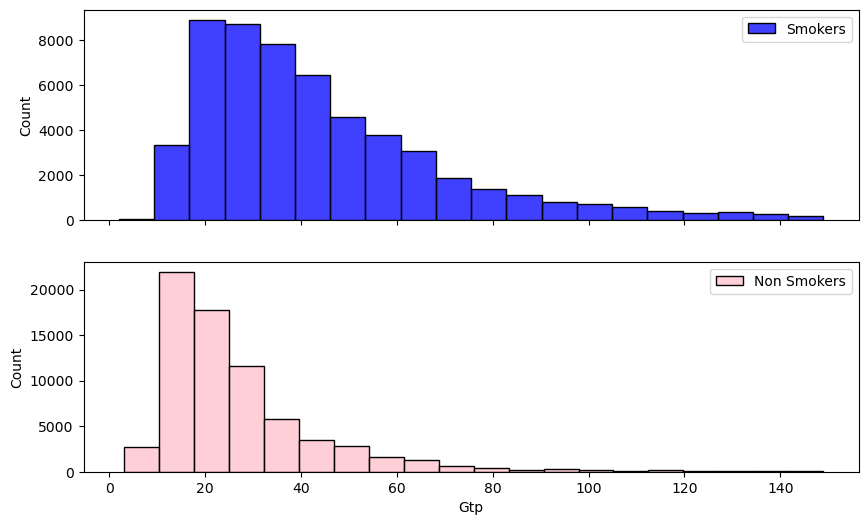

Analysis of Gtp with respect to Smokers:
+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               |   43.71 |
+--------------------+---------+
| Standard Deviation |   25.31 |
+--------------------+---------+
| Median             |   37    |
+--------------------+---------+
| Standard Deviation |   25.31 |
+--------------------+---------+
| Skewness           |    1.41 |
+--------------------+---------+
| Kurtosis           |    2.1  |
+--------------------+---------+


Analysis of Gtp with respect to nonsmokers:
+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               |   26.94 |
+--------------------+---------+
| Standard Deviation |   17.74 |
+--------------------+---------+
| Median             |   21    |
+--------------------+---------+
| Standard Deviation |   17.74 |
+--------------------+---------+
| Skewness           |    2.36 |
+--------------------+

In [52]:
#Analyzing with respect to target variable after removing outliers
Gtp_df = train_df[train_df['Gtp'] < 150]
Gtp_smokers = Gtp_df[Gtp_df['smoking'] == 1]['Gtp']
Gtp_nonsmokers = Gtp_df[Gtp_df['smoking'] == 0]['Gtp']


# Creating subplots for Gtp feature
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
sns.histplot(data=Gtp_smokers, color='blue', bins=20, label='Smokers', ax=ax1)
ax1.legend()

sns.histplot(data=Gtp_nonsmokers, color='pink', bins=20, label='Non Smokers', ax=ax2)
ax2.legend()

plt.tight_layout
plt.show()

# Descriptive statistics of the Gtp feature
print("Analysis of Gtp with respect to Smokers:")
table_data = [
    ["Mean", round(Gtp_smokers.mean(), 2)],
    ["Standard Deviation", round(Gtp_smokers.std(), 2)],
    ["Median", round(Gtp_smokers.median(), 2)],
    ["Standard Deviation", round(Gtp_smokers.std(), 2)],
    ["Skewness", round(Gtp_smokers.skew(), 2)],
    ["Kurtosis", round(Gtp_smokers.kurtosis(), 2)]

]
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))

print("\n")

print("Analysis of Gtp with respect to nonsmokers:")
table_data=[
    ["Mean", round(Gtp_nonsmokers.mean(), 2)],
    ["Standard Deviation", round(Gtp_nonsmokers.std(), 2)],
    ["Median", round(Gtp_nonsmokers.median(), 2)],
    ["Standard Deviation", round(Gtp_nonsmokers.std(), 2)],
    ["Skewness", round(Gtp_nonsmokers.skew(), 2)],
    ["Kurtosis", round(Gtp_nonsmokers.kurtosis(), 2)]
]
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))

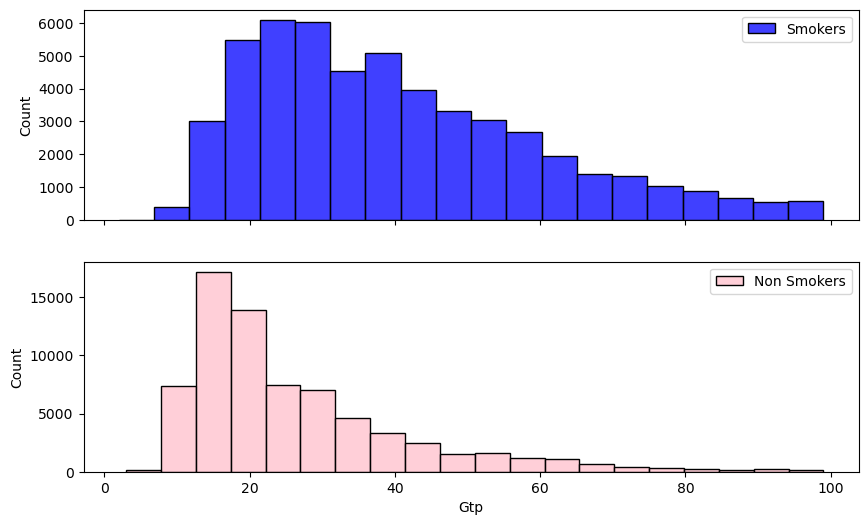

Analysis of Gtp with respect to Smokers:
+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               |   40.18 |
+--------------------+---------+
| Standard Deviation |   19.64 |
+--------------------+---------+
| Median             |   36    |
+--------------------+---------+
| Standard Deviation |   19.64 |
+--------------------+---------+
| Skewness           |    0.84 |
+--------------------+---------+
| Kurtosis           |    0.11 |
+--------------------+---------+


Analysis of Gtp with respect to nonsmokers:
+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               |   26.06 |
+--------------------+---------+
| Standard Deviation |   15.36 |
+--------------------+---------+
| Median             |   21    |
+--------------------+---------+
| Standard Deviation |   15.36 |
+--------------------+---------+
| Skewness           |    1.72 |
+--------------------+

In [68]:
#Examining another case of dropping outliers
Gtp_df_drop_outlier = train_df[train_df['Gtp'] < 100]
Gtp_smokers = Gtp_df_drop_outlier[Gtp_df_drop_outlier['smoking'] == 1]['Gtp']
Gtp_nonsmokers = Gtp_df_drop_outlier[Gtp_df_drop_outlier['smoking'] == 0]['Gtp']


# Creating subplots for Gtp feature
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
sns.histplot(data=Gtp_smokers, color='blue', bins=20, label='Smokers', ax=ax1)
ax1.legend()

sns.histplot(data=Gtp_nonsmokers, color='pink', bins=20, label='Non Smokers', ax=ax2)
ax2.legend()

plt.tight_layout
plt.show()

# Descriptive statistics of the Gtp feature
print("Analysis of Gtp with respect to Smokers:")
table_data = [
    ["Mean", round(Gtp_smokers.mean(), 2)],
    ["Standard Deviation", round(Gtp_smokers.std(), 2)],
    ["Median", round(Gtp_smokers.median(), 2)],
    ["Standard Deviation", round(Gtp_smokers.std(), 2)],
    ["Skewness", round(Gtp_smokers.skew(), 2)],
    ["Kurtosis", round(Gtp_smokers.kurtosis(), 2)]

]
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))

print("\n")

print("Analysis of Gtp with respect to nonsmokers:")
table_data=[
    ["Mean", round(Gtp_nonsmokers.mean(), 2)],
    ["Standard Deviation", round(Gtp_nonsmokers.std(), 2)],
    ["Median", round(Gtp_nonsmokers.median(), 2)],
    ["Standard Deviation", round(Gtp_nonsmokers.std(), 2)],
    ["Skewness", round(Gtp_nonsmokers.skew(), 2)],
    ["Kurtosis", round(Gtp_nonsmokers.kurtosis(), 2)]
]
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))

<h3> Deciding Between Z-score and Min Max</h3>

<Axes: >

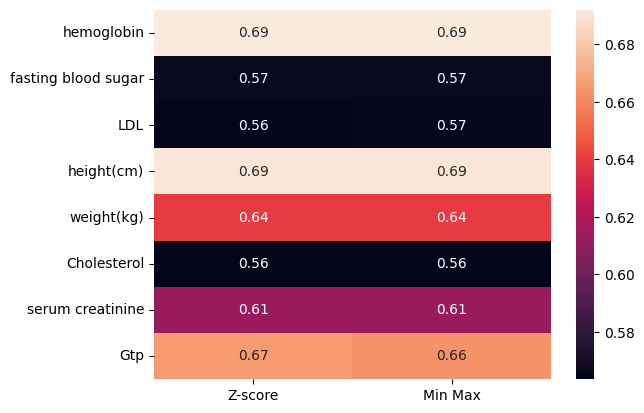

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

continuous_features = ['hemoglobin','fasting blood sugar','LDL','height(cm)','weight(kg)','Cholesterol','serum creatinine','Gtp']
scores = []

for feature_name in continuous_features:
    z_norm_feature = zscore_norm(train_df, feature_name).to_frame()
    min__max_feature = min_max_norm(train_df, feature_name).to_frame()
    logreg_z = LogisticRegression()

    logreg_z.fit(z_norm_feature, train_df["smoking"])
    accuracy_zscore = accuracy_score(train_df["smoking"], logreg_z.predict(z_norm_feature))

    logreg_min_max = LogisticRegression()
    logreg_min_max.fit(min__max_feature, train_df["smoking"])
    accuracy_min_max = accuracy_score(train_df["smoking"], logreg_min_max.predict(min__max_feature))

    scores.append((accuracy_zscore, accuracy_min_max))

sns.heatmap(scores, annot=True, xticklabels=["Z-score", "Min Max"], yticklabels=continuous_features)


    


# **Bivariate Data Analysis**

<h3>Correlation Matrix</h3>

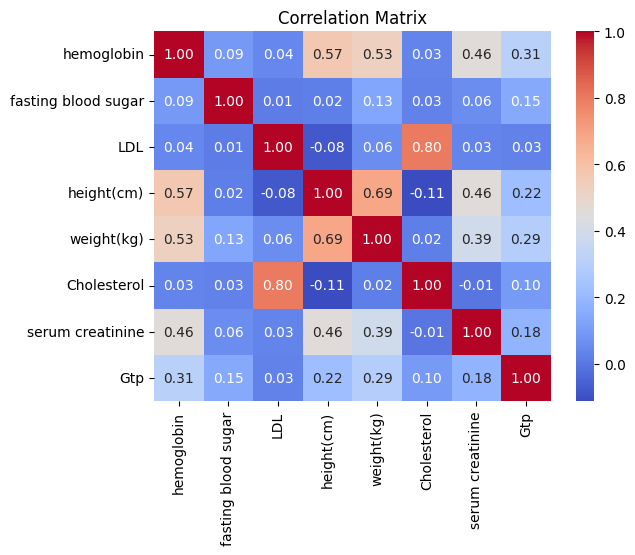

In [105]:
continuous_features = ['hemoglobin','fasting blood sugar','LDL','height(cm)','weight(kg)','Cholesterol','serum creatinine','Gtp'] 
continuous_features = train_df[continuous_features]

# Visualize the correlation matrix using Seaborn's heatmap
sns.heatmap(continuous_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

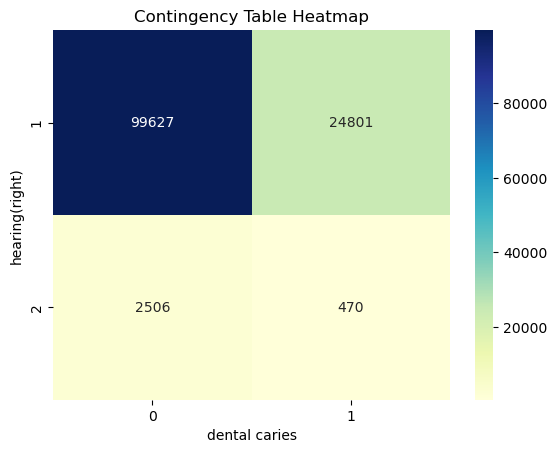

In [54]:
contingency_table = pd.crosstab(train_df['hearing(right)'], train_df['dental caries'])

sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Contingency Table Heatmap')
plt.show()

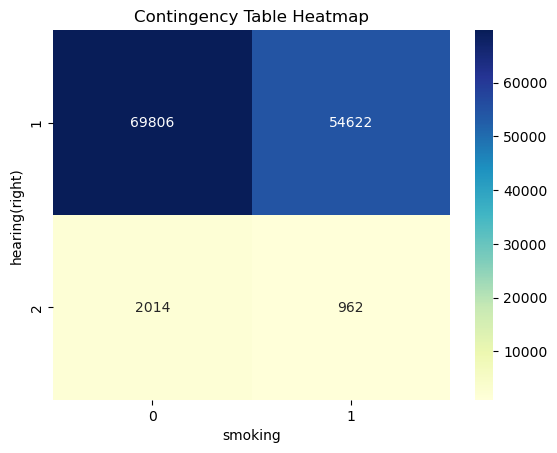

In [55]:
contingency_table = pd.crosstab(train_df['hearing(right)'], train_df['smoking'])

sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Contingency Table Heatmap')
plt.show()

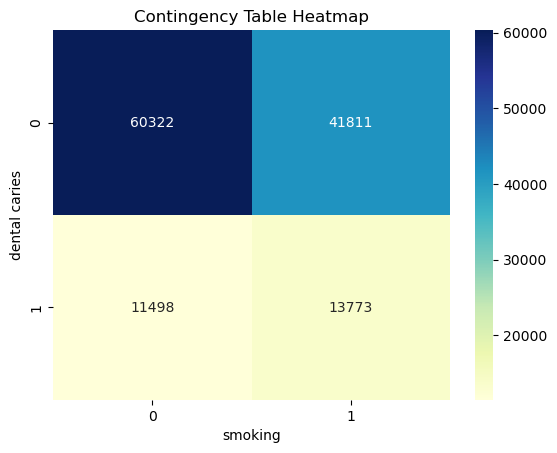

In [56]:
contingency_table = pd.crosstab(train_df['dental caries'], train_df['smoking'])

sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Contingency Table Heatmap')
plt.show()

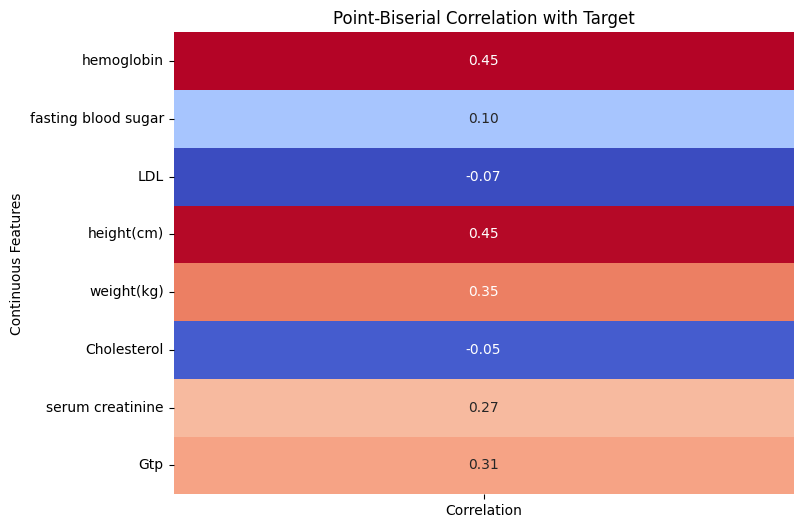

In [20]:
import scipy.stats as stats

continuous_features = ['hemoglobin','fasting blood sugar','LDL','height(cm)','weight(kg)','Cholesterol','serum creatinine','Gtp']  # Add more features as needed
target_variable = 'smoking'  

correlation_values = []

for feature in continuous_features:
    corr, p_value = stats.pointbiserialr(train_df[target_variable], train_df[feature])
    correlation_values.append(corr)

# Create a DataFrame with correlation values
correlation_df = pd.DataFrame(data=correlation_values, index=continuous_features, columns=['Correlation'])

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Point-Biserial Correlation with Target')
plt.ylabel('Continuous Features')
plt.show()

<h3>LDL and Cholestrol:</h3>

There is a very high correlation between LDL and Cholestrol.
This makes sense because total cholestrol equals LDL + HDL.
Out of 150,000+ samples, there are 24 with LDL > Cholestrol, which is impossible.
This means that the dataset contains some incorrect readings for LDL and/or Cholestrol levels.

In [21]:
df_chol_LDL = train_df[train_df["LDL"] >= train_df["Cholesterol"]][["Cholesterol", "LDL"]]
print("Lenght Equals: ", len(df_chol_LDL))
print(df_chol_LDL)

Lenght Equals:  22
        Cholesterol   LDL
21041           176  1070
35901           181  1120
109197          245  1860
12273           252  1660
94519           197  1200
148944          167   167
15691           202  1220
100443          255  1660
60339           121   121
111220          207  1220
15898           139   790
32148            77  1220
141717          140   165
94365           172   220
138443          154   168
3004             91   156
55119           183  1070
120247          174  1200
52900           130   149
75992           152   216
92036           119   119
120029          174  1010


<h3>Categorical Plots:</h3>

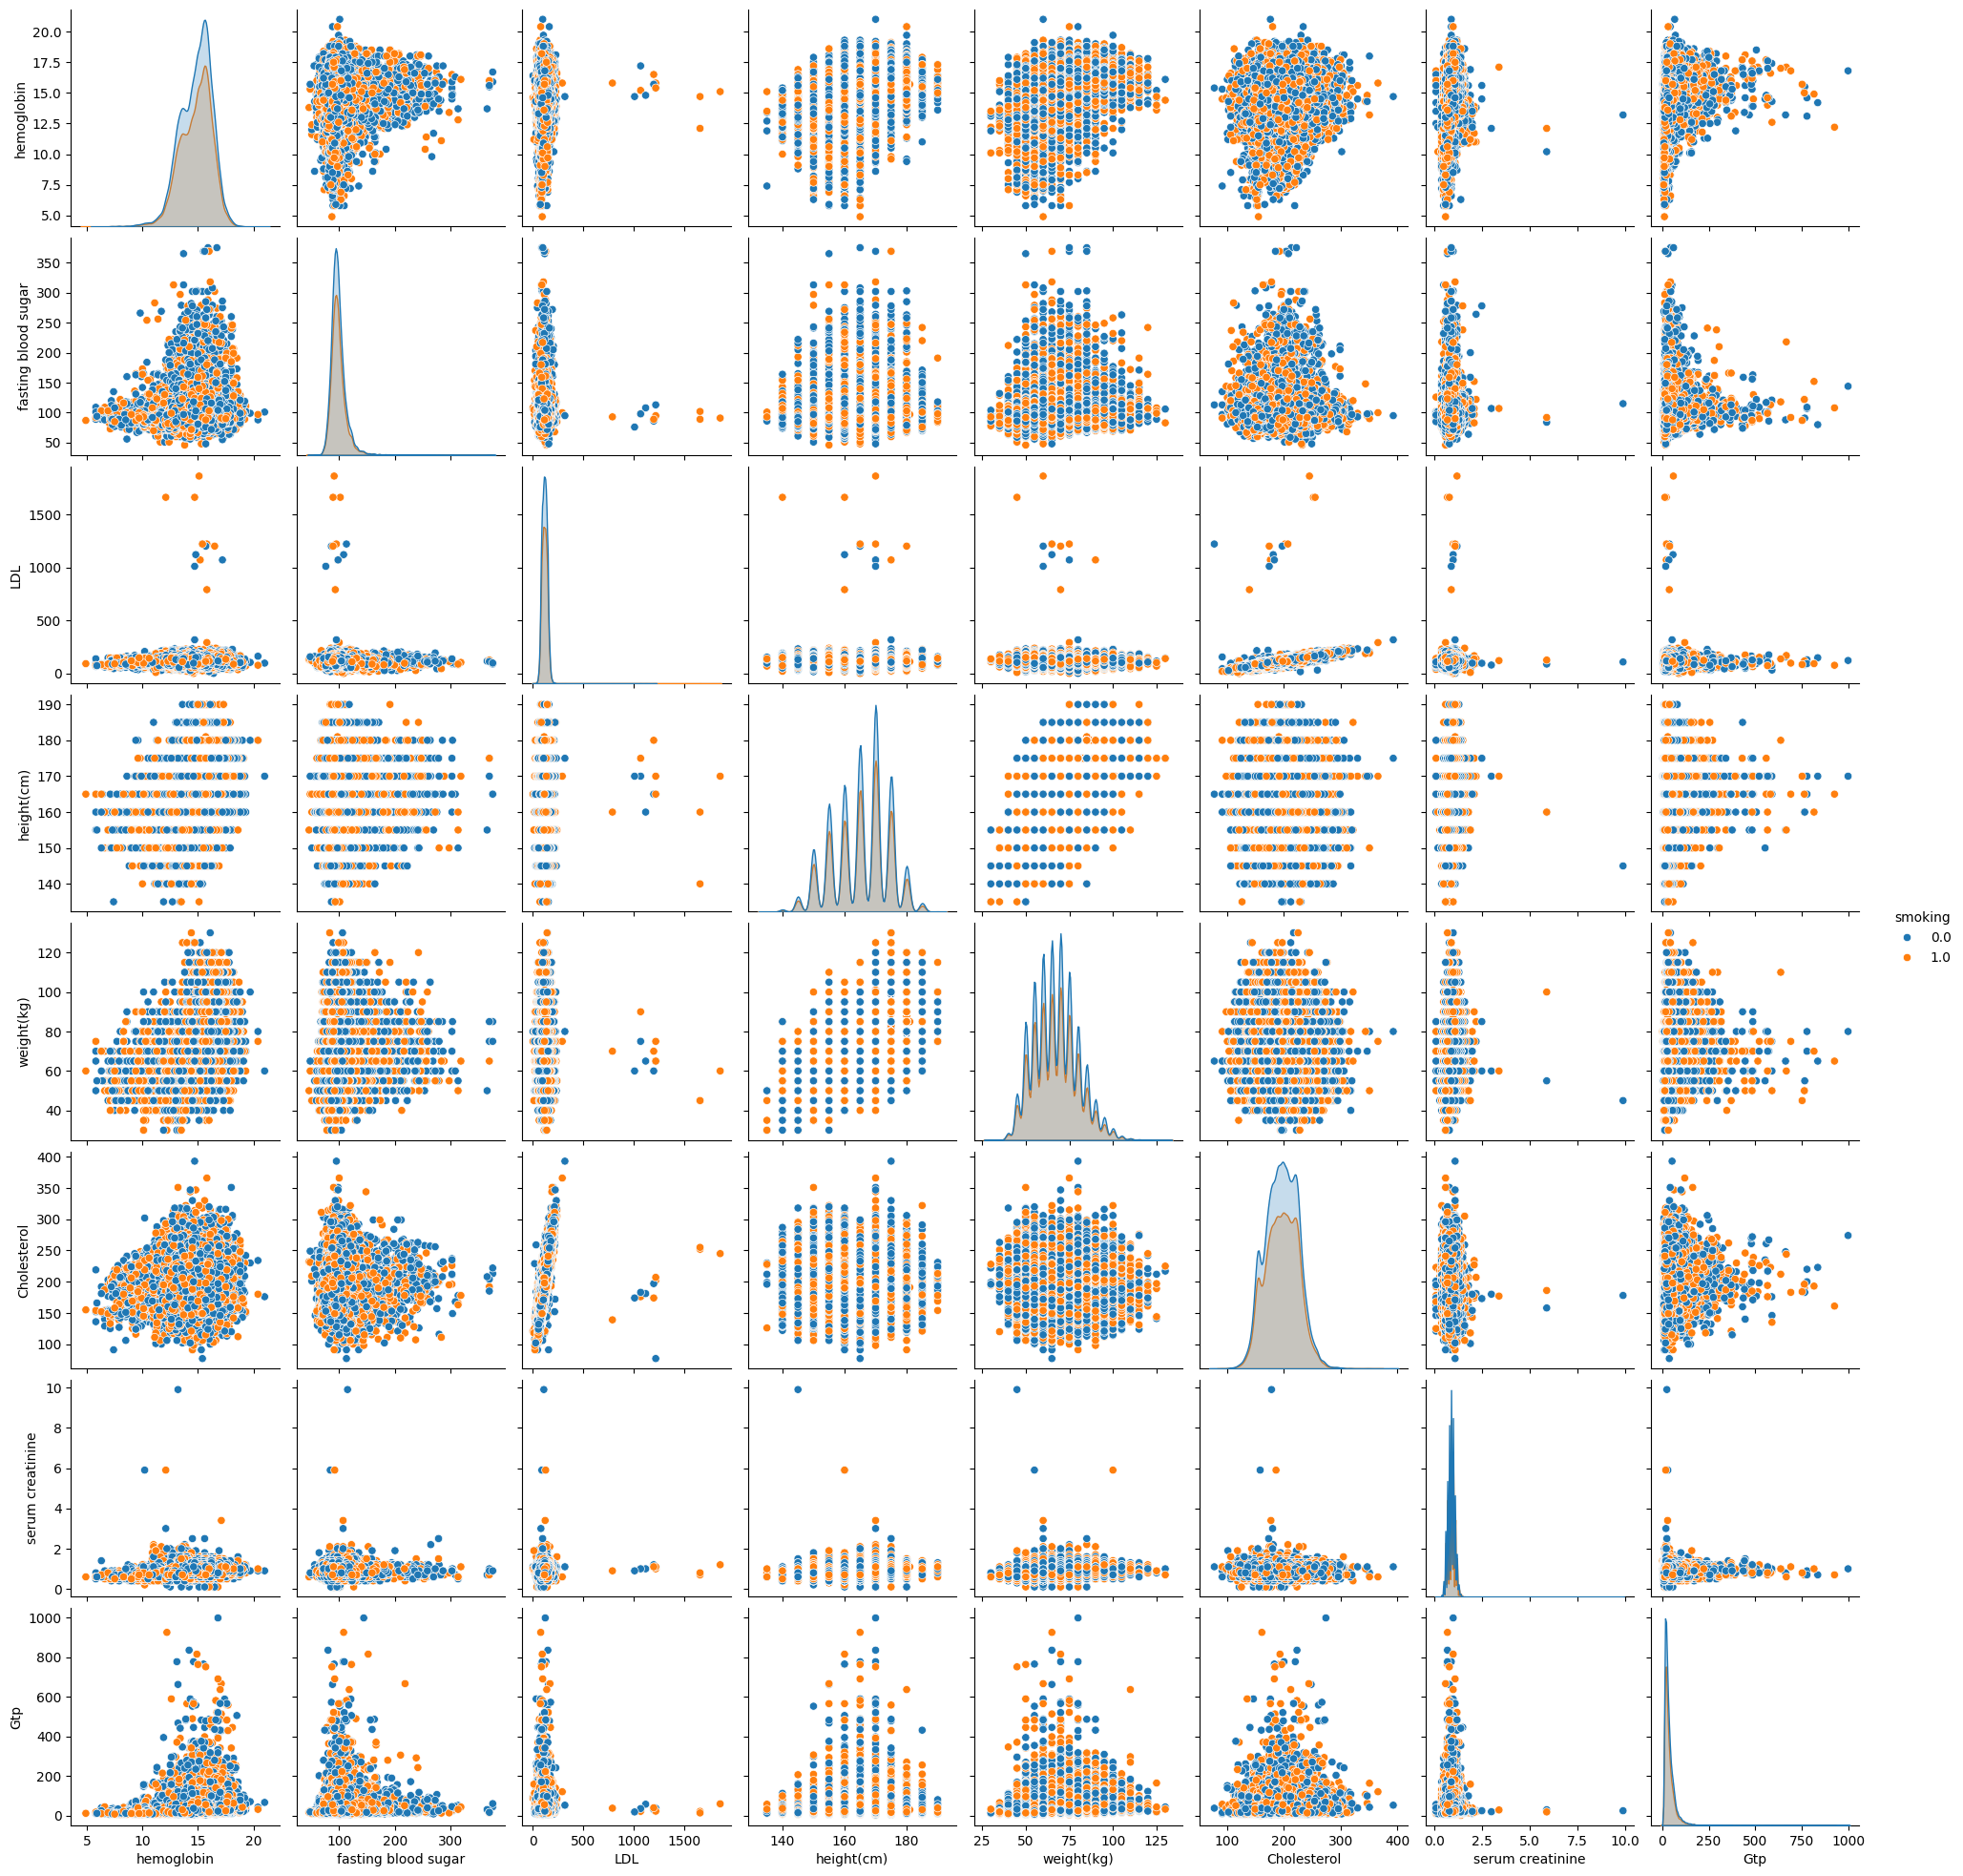

In [23]:
continuous_df = df[continuous_features]
sns.pairplot(pd.concat([continuous_df.reset_index(drop=True), train_df[["smoking"]].reset_index(drop=True)], axis=1), hue='smoking')
plt.show()

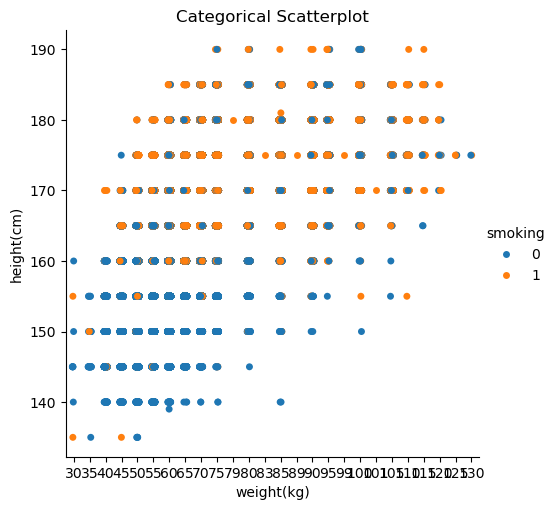

In [60]:
sns.catplot(x='weight(kg)', y='height(cm)', hue='smoking', data=train_df)
plt.title('Categorical Scatterplot')
plt.show()

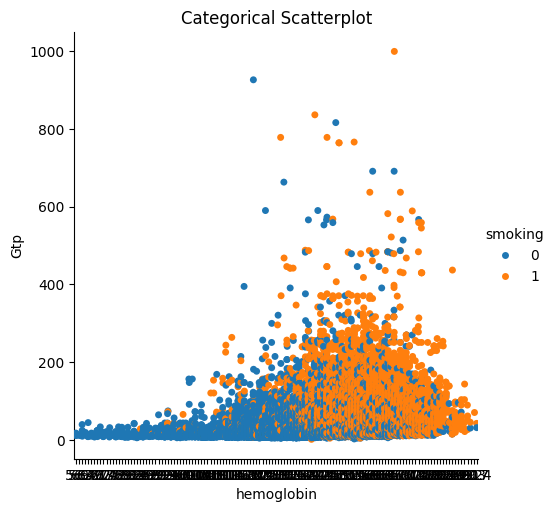

In [59]:
sns.catplot(x='hemoglobin', y='Gtp', hue='smoking', data=train_df)
plt.title('Categorical Scatterplot')
plt.show()

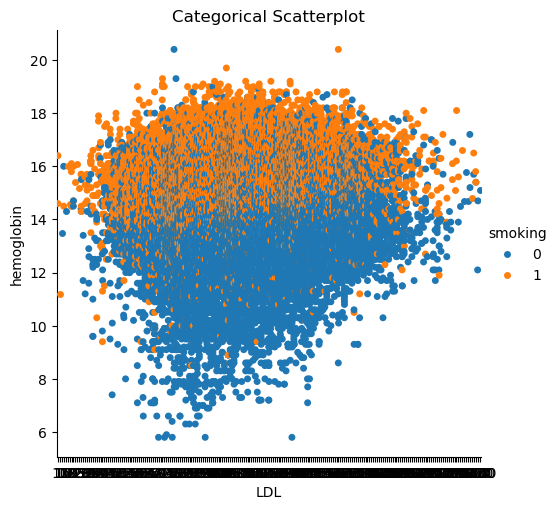

In [61]:
sns.catplot(x='LDL', y='hemoglobin', hue='smoking', data=train_df)
plt.title('Categorical Scatterplot')
plt.show()

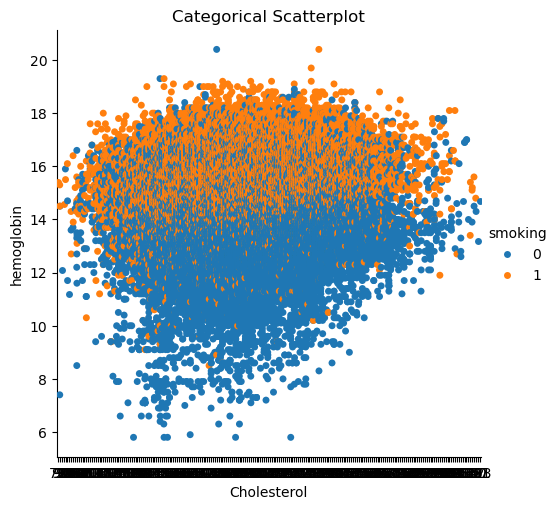

In [62]:
sns.catplot(x='Cholesterol', y='hemoglobin', hue='smoking', data=train_df)
plt.title('Categorical Scatterplot')
plt.show()

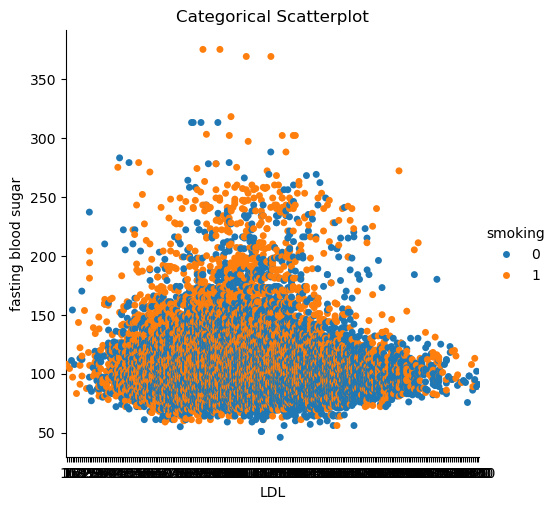

In [63]:
sns.catplot(x='LDL', y='fasting blood sugar', hue='smoking', data=train_df)
plt.title('Categorical Scatterplot')
plt.show()

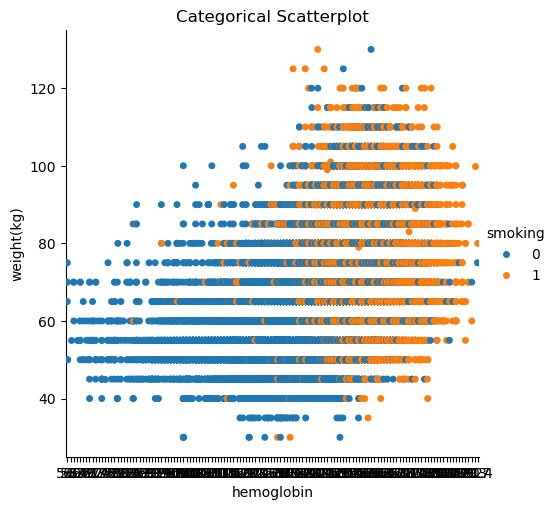

In [64]:
sns.catplot(x='hemoglobin', y='weight(kg)', hue='smoking', data=train_df)
plt.title('Categorical Scatterplot')
plt.show()

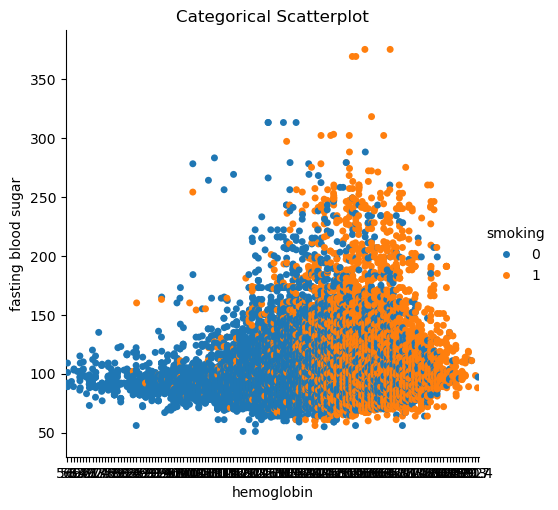

In [65]:
sns.catplot(x='hemoglobin', y='fasting blood sugar', hue='smoking', data=train_df)
plt.title('Categorical Scatterplot')
plt.show()

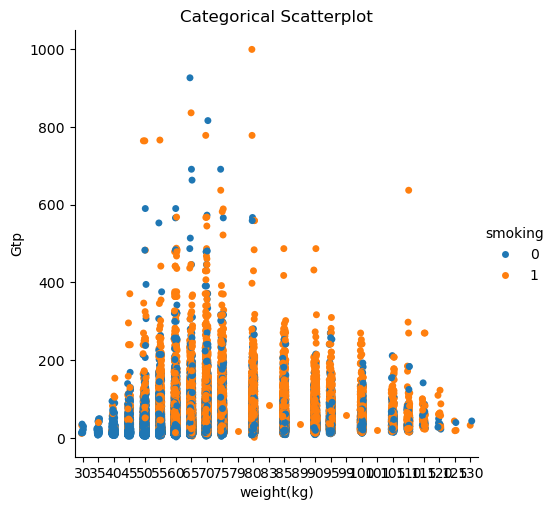

In [66]:
sns.catplot(x='weight(kg)', y='Gtp', hue='smoking', data=train_df)
plt.title('Categorical Scatterplot')
plt.show()

<h3>Bivariate Logistic Analysis </h3>

<Axes: >

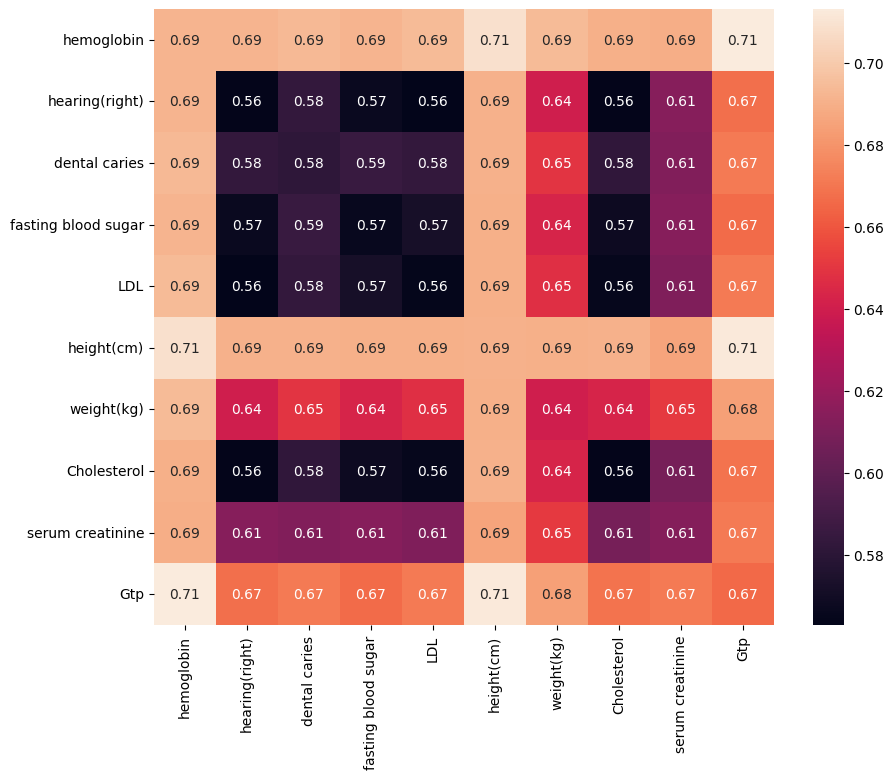

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np


normalized_df = train_df.copy()

#Preprocessing
normalized_df['hemoglobin']          = zscore_norm(normalized_df, 'hemoglobin')
normalized_df['hearing(right)']      = normalized_df['hearing(right)'] - 1
normalized_df['fasting blood sugar'] = zscore_norm(normalized_df, 'fasting blood sugar')
normalized_df['LDL']                 = zscore_norm(normalized_df, 'LDL')
normalized_df['height(cm)']          = zscore_norm(normalized_df, 'height(cm)')
normalized_df['weight(kg)']          = zscore_norm(normalized_df, 'weight(kg)')
normalized_df['Cholesterol']         = zscore_norm(normalized_df, 'Cholesterol')
normalized_df['serum creatinine']    = zscore_norm(normalized_df, 'serum creatinine')
normalized_df['Gtp']                 = zscore_norm(normalized_df, 'Gtp')
 

#Performing Logistic Regression On every pair

features = ['hemoglobin','hearing(right)','dental caries','fasting blood sugar','LDL','height(cm)','weight(kg)','Cholesterol','serum creatinine','Gtp']
matrix = np.zeros((len(features), len(features)))

for i in range(0,len(features)):
    for j in range(0, len(features)):
        if j >= i:
            logreg = LogisticRegression()
            logreg.fit(normalized_df[[features[i], features[j]]], normalized_df["smoking"])
            matrix[i][j] = accuracy_score(normalized_df["smoking"], logreg.predict(normalized_df[[features[i], features[j]]]))
        else:
            matrix[i][j] = matrix[j][i]


plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, xticklabels=features, yticklabels=features)


# **Multivariate Data Analysis**

<h3>Multivariate Logistic Analysis </h3>

Logistic Regression Accuracy: 73.13%


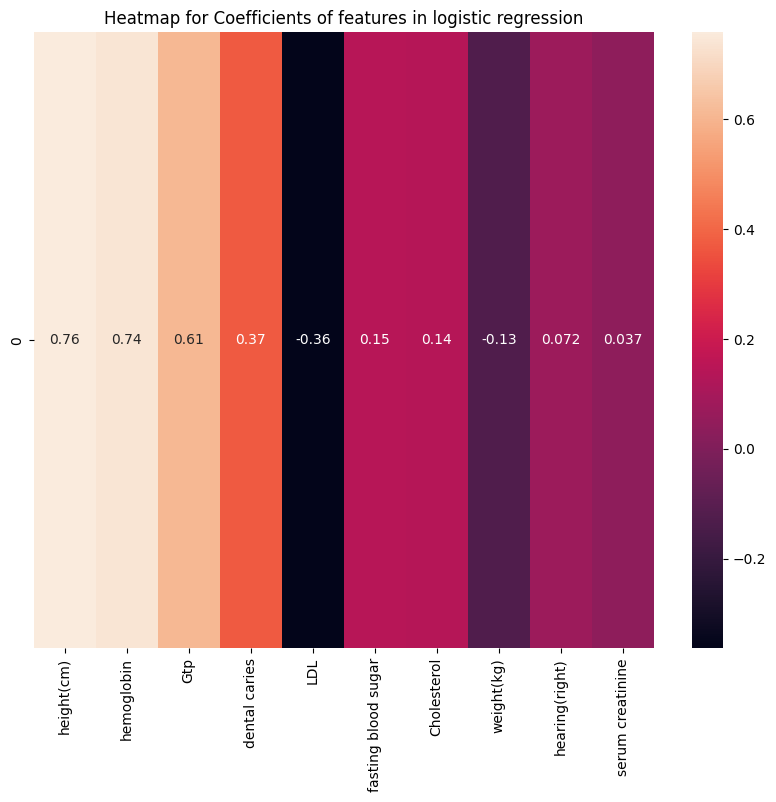

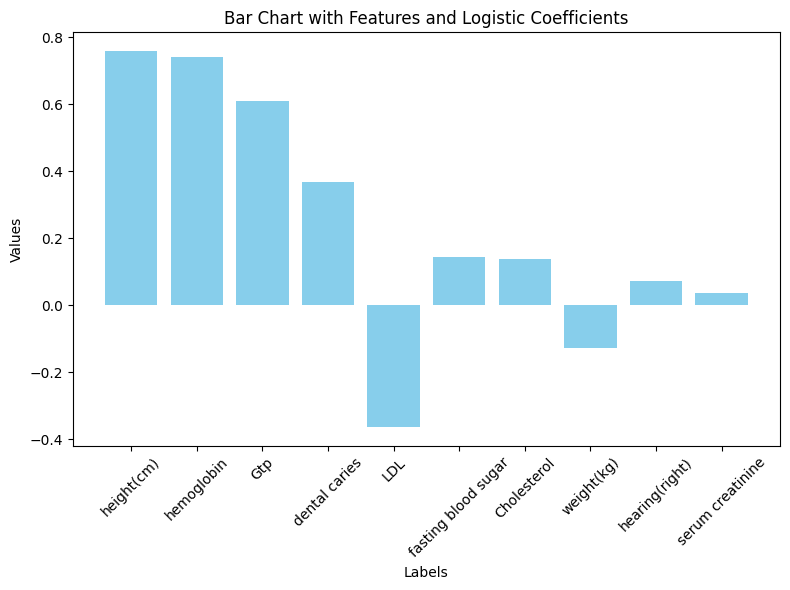

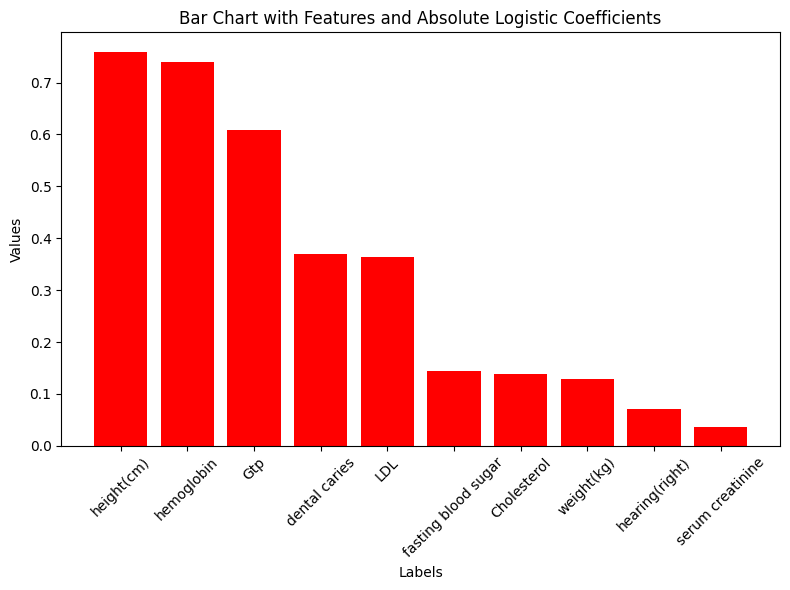

In [11]:
normalized_df = train_df.copy()

#Preprocessing
normalized_df['hemoglobin']          = zscore_norm(normalized_df, 'hemoglobin')
normalized_df['hearing(right)']      = normalized_df['hearing(right)'] - 1
normalized_df['fasting blood sugar'] = zscore_norm(normalized_df, 'fasting blood sugar')
normalized_df['LDL']                 = zscore_norm(normalized_df, 'LDL')
normalized_df['height(cm)']          = zscore_norm(normalized_df, 'height(cm)')
normalized_df['weight(kg)']          = zscore_norm(normalized_df, 'weight(kg)')
normalized_df['Cholesterol']         = zscore_norm(normalized_df, 'Cholesterol')
normalized_df['serum creatinine']    = zscore_norm(normalized_df, 'serum creatinine')
normalized_df['Gtp']                 = zscore_norm(normalized_df, 'Gtp')

logreg = LogisticRegression()
logreg.fit(normalized_df.drop(columns=["smoking","Unnamed: 0"]), normalized_df["smoking"])
accuracy = accuracy_score(normalized_df["smoking"], logreg.predict(normalized_df.drop(columns=["smoking","Unnamed: 0"])))

print(f"Logistic Regression Accuracy: {round(accuracy*100,2)}%")


feature_coeff = list(zip(features,logreg.coef_.tolist()[0]))
feature_coeff = sorted(feature_coeff, key=lambda x: -abs(x[1]))

sorted_features = list(zip(*feature_coeff))[0]
sorted_coeff = list(zip(*feature_coeff))[1]


plt.figure(figsize=(10, 8))
plt.title("Heatmap for Coefficients of features in logistic regression")
sns.heatmap([sorted_coeff], annot=True, xticklabels=sorted_features)


plt.figure(figsize=(8, 6))
plt.bar(sorted_features, sorted_coeff, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Values')
plt.title('Bar Chart with Features and Logistic Coefficients')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()




plt.figure(figsize=(8, 6))
plt.bar(sorted_features, [abs(i) for i in sorted_coeff], color='red')
plt.xlabel('Labels')
plt.ylabel('Values')
plt.title('Bar Chart with Features and Absolute Logistic Coefficients')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<h3><h3>PCA Dimensionality Reduction</h3></h3>

In [45]:
from sklearn.decomposition import PCA


pca = PCA()

data_dim_reduction = normalized_df.drop(columns=['Unnamed: 0', 'smoking']).to_numpy()

pca.fit(data_dim_reduction)


variance_ratios = pca.explained_variance_ratio_
total_variance = 0
for i, variance_ratio in enumerate(variance_ratios):
    total_variance += variance_ratio
    print(f"Variance explained by PC{i + 1}: {variance_ratio:.4f}. Total variance upt to PC{i + 1}: {total_variance:.4f}")

Variance explained by PC1: 0.3332. Total variance upt to PC1: 0.3332
Variance explained by PC2: 0.2232. Total variance upt to PC2: 0.5564
Variance explained by PC3: 0.1275. Total variance upt to PC3: 0.6839
Variance explained by PC4: 0.0987. Total variance upt to PC4: 0.7826
Variance explained by PC5: 0.0796. Total variance upt to PC5: 0.8622
Variance explained by PC6: 0.0576. Total variance upt to PC6: 0.9197
Variance explained by PC7: 0.0345. Total variance upt to PC7: 0.9542
Variance explained by PC8: 0.0239. Total variance upt to PC8: 0.9781
Variance explained by PC9: 0.0191. Total variance upt to PC9: 0.9972
Variance explained by PC10: 0.0028. Total variance upt to PC10: 1.0000


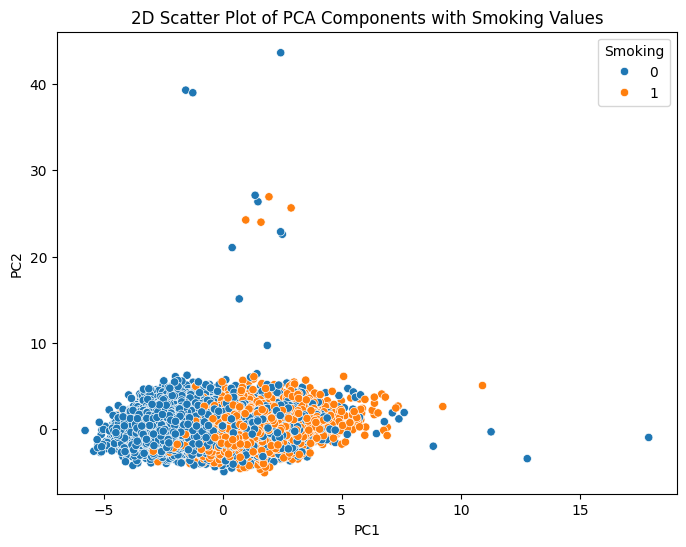

In [40]:
pca = PCA(2)
pca.fit(data_dim_reduction)
transformed_data = pca.transform(data_dim_reduction)
transformed_df = pd.DataFrame(data=transformed_data, columns=['PC1', 'PC2'])
transformed_df = pd.concat([transformed_df.reset_index(drop=True), normalized_df['smoking'].reset_index(drop=True)], axis=1, ignore_index=True)
transformed_df.columns = ['PC1', 'PC2', 'smoking']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='smoking', data=transformed_df)
plt.title('2D Scatter Plot of PCA Components with Smoking Values')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Smoking')
plt.show()



    

Text(0.5, 0.92, '3D Scatter Plot of Principal Components with Smoking Labels')

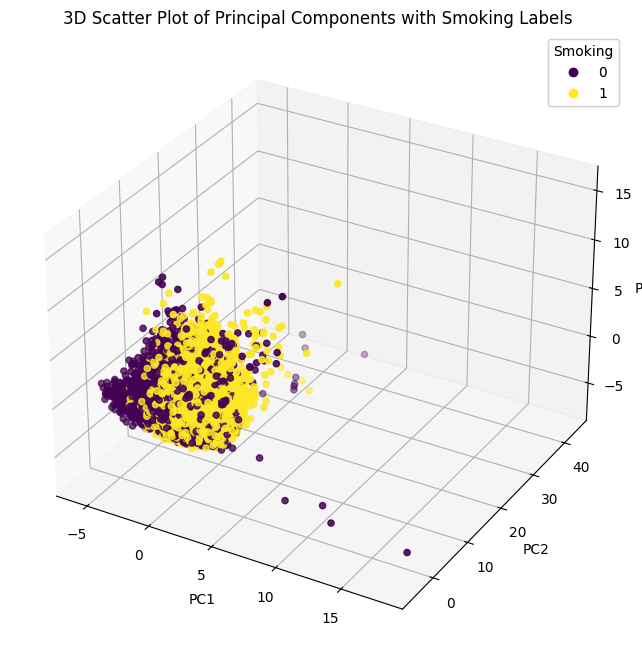

In [73]:
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(3)
pca.fit(data_dim_reduction)
transformed_data = pca.transform(data_dim_reduction)
transformed_df = pd.DataFrame(data=transformed_data, columns=['PC1', 'PC2', 'PC3'])
transformed_df = pd.concat([transformed_df.reset_index(drop=True), normalized_df['smoking'].reset_index(drop=True)], axis=1, ignore_index=True)
transformed_df.columns = ['PC1', 'PC2', 'PC3', 'smoking']



# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color representing 'smoking' labels
scatter = ax.scatter(transformed_df['PC1'], transformed_df['PC2'], transformed_df['PC3'], c=transformed_df['smoking'], cmap='viridis')

# Legend for 'smoking' labels
legend = ax.legend(*scatter.legend_elements(), title='Smoking')
ax.add_artist(legend)

# Set labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot of Principal Components with Smoking Labels')




<h3>TSNE Dimensionality Reduction</h3>

In [46]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

data_2d = tsne.fit_transform(data_dim_reduction)
print(data_2d)


tsne_df = pd.concat([pd.DataFrame(data=data_2d).reset_index(drop=True), normalized_df['smoking'].reset_index(drop=True)], axis=1, ignore_index=True)
tsne_df.columns = ['X1', 'X2', 'smoking']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='X1', y='X2', hue='smoking', data=tsne_df)
plt.title('2D Scatter Plot of TSNE Components with Smoking Values')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(title='Smoking')
plt.show()


[[-100.022675  -27.173464]
 [ -37.061886   95.31446 ]
 [ -70.360085  -64.210754]
 ...
 [ -56.890118  -67.60104 ]
 [  30.280472   37.65249 ]
 [  51.772713   82.80593 ]]


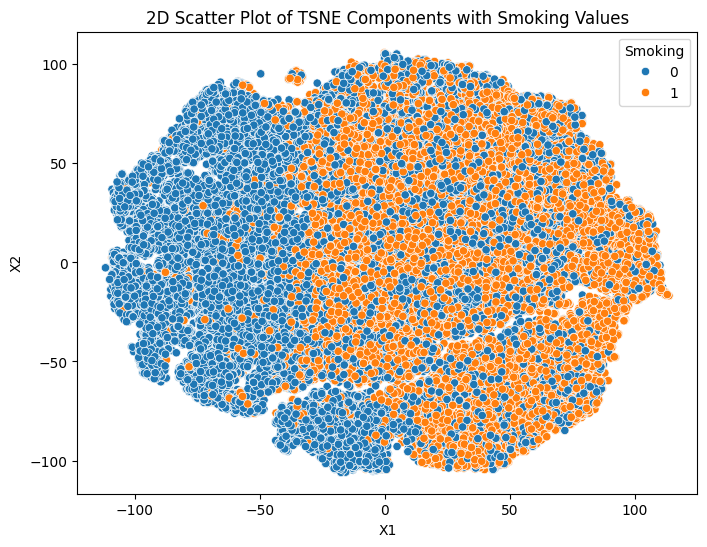

In [53]:
tsne = TSNE(n_components=2)

data_2d = tsne.fit_transform(data_dim_reduction)
print(data_2d)


tsne_df = pd.concat([pd.DataFrame(data=data_2d).reset_index(drop=True), normalized_df['smoking'].reset_index(drop=True)], axis=1, ignore_index=True)
tsne_df.columns = ['X1', 'X2', 'smoking']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='X1', y='X2', hue='smoking', data=tsne_df)
plt.title('2D Scatter Plot of TSNE Components with Smoking Values')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(title='Smoking')
plt.show()